In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
sns.set(style="darkgrid",font_scale=1.2)
pd.set_option("display.max.columns",None)
pd.set_option("display.max.rows",None)

from scipy import stats
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV, ElasticNetCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, StackingRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor

from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split,cross_val_score, cross_val_predict, learning_curve
from sklearn.preprocessing import LabelEncoder,PowerTransformer
from sklearn.feature_selection import SelectKBest, f_regression
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import mean_absolute_error,mean_absolute_percentage_error,mean_squared_error,r2_score

In [2]:
df = pd.read_csv(r"C:\Users\mayur\Downloads\archive (6)\cars_engage_2022 (1).csv",index_col=[0])

In [3]:
df.head(3)

,Make,Model,Variant,Ex-Showroom_Price,Displacement,Cylinders,Valves_Per_Cylinder,Drivetrain,Cylinder_Configuration,Emission_Norm,Engine_Location,Fuel_System,Fuel_Tank_Capacity,Fuel_Type,Height,Length,Width,Body_Type,Doors,City_Mileage,Highway_Mileage,ARAI_Certified_Mileage,ARAI_Certified_Mileage_for_CNG,Kerb_Weight,Gears,Ground_Clearance,Front_Brakes,Rear_Brakes,Front_Suspension,Rear_Suspension,Front_Track,Rear_Track,Front_Tyre_&_Rim,Rear_Tyre_&_Rim,Power_Steering,Power_Windows,Power_Seats,Keyless_Entry,Power,Torque,Odometer,Speedometer,Tachometer,Tripmeter,Seating_Capacity,Seats_Material,Type,Wheelbase,Wheels_Size,Start_/_Stop_Button,12v_Power_Outlet,Audiosystem,Aux-in_Compatibility,Average_Fuel_Consumption,Basic_Warranty,Bluetooth,Boot-lid_Opener,Boot_Space,CD_/_MP3_/_DVD_Player,Central_Locking,Child_Safety_Locks,Clock,Cup_Holders,Distance_to_Empty,Door_Pockets,Engine_Malfunction_Light,Extended_Warranty,FM_Radio,Fuel-lid_Opener,Fuel_Gauge,Handbrake,Instrument_Console,Low_Fuel_Warning,Minimum_Turning_Radius,Multifunction_Display,Sun_Visor,Third_Row_AC_Vents,Ventilation_System,Auto-Dimming_Rear-View_Mirror,Hill_Assist,Gear_Indicator,3_Point_Seat-Belt_in_Middle_Rear_Seat,Ambient_Lightning,Cargo/Boot_Lights,Drive_Modes,Engine_Immobilizer,High_Speed_Alert_System,Lane_Watch_Camera/_Side_Mirror_Camera,Passenger_Side_Seat-Belt_Reminder,Seat_Back_Pockets,Voice_Recognition,Walk_Away_Auto_Car_Lock,ABS_(Anti-lock_Braking_System),Headlight_Reminder,Adjustable_Headrests,Gross_Vehicle_Weight,Airbags,Door_Ajar_Warning,EBD_(Electronic_Brake-force_Distribution),Fasten_Seat_Belt_Warning,Gear_Shift_Reminder,Number_of_Airbags,Compression_Ratio,Adjustable_Steering_Column,Other_Specs,Other_specs,Parking_Assistance,Key_Off_Reminder,USB_Compatibility,Android_Auto,Apple_CarPlay,Cigarette_Lighter,Infotainment_Screen,Multifunction_Steering_Wheel,Average_Speed,EBA_(Electronic_Brake_Assist),Seat_Height_Adjustment,Navigation_System,Second_Row_AC_Vents,Tyre_Pressure_Monitoring_System,Rear_Center_Armrest,iPod_Compatibility,ESP_(Electronic_Stability_Program),Cooled_Glove_Box,Recommended_Tyre_Pressure,Heated_Seats,Turbocharger,ISOFIX_(Child-Seat_Mount),Rain_Sensing_Wipers,Paddle_Shifters,Leather_Wrapped_Steering,Automatic_Headlamps,Engine_Type,ASR_/_Traction_Control,Cruise_Control,USB_Ports,Heads-Up_Display,Welcome_Lights,Battery,Electric_Range
0,Tata,Nano Genx,Xt,"Rs. 2,92,667",624 cc,2.0,2.0,RWD (Rear Wheel Drive),In-line,BS IV,"Rear, Transverse",Injection,24 litres,Petrol,1652 mm,3164 mm,1750 mm,Hatchback,5.0,?23.6 km/litre,NaN,23.6 km/litre,NaN,660 kg,4,180 mm,Drum,Drum,"Independent, Lower Wishbone, McPherson Strut w...","Independent, Semi Trailing arm with coil sprin...",1325 mm,1315 mm,135/70R12,155/65R12,Electric Power,Only Front Windows,NaN,Remote,38PS@5500rpm,51Nm@4000rpm,Digital,Analog,Not on offer,Yes,4.0,Fabric,Manual,2230 mm,4 B X 12,Yes,Yes,CD Player with USB & Aux-in,Yes,Yes,2 years /75000 Kms (years/distance whichever c...,Yes,Internal,110 litres,Yes,Yes,Yes,Digital,Front,Yes,Front,Yes,2 years /150000 Kms (years/distance whichever ...,Yes,Internal,Digital,Manual,Analog + Digital,Yes,4 meter,Yes,Driver & Front Passenger,Not Applicable,Manual Air conditioning with cooling and heating,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Tata,Nano Genx,Xe,"Rs. 2,36,447",624 cc,2.0,2.0,RWD (Rear Wheel Drive),In-line,BS IV,"Rear, Transverse",Injection,24 litres,Petrol,1652 mm,3164 mm,1750 mm,Hatchback,5.0,?23.6 km/litre,NaN,23.6 km/litre,NaN,725 kg,4,180 mm,Drum,Drum,"Independent, Lower Wishbone, McPherson Strut w...","Independent, Semi Trailing arm with coil sprin...",1325 mm,1315 mm,135/70R12,155/65R12,NaN,NaN,NaN,NaN,38PS@5500rpm,51Nm@4000rpm,Digital,Analog,Not on offer,Yes,4.0,Fabric,Manual,2230 mm,4 B X 12,NaN,Yes,Not on offer,NaN,Yes,2 years /75000 K

In [4]:
df.shape

(1276, 140)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1276 entries, 0 to 1275
Columns: 140 entries, Make to Electric_Range
dtypes: float64(6), object(134)
memory usage: 1.4+ MB


In [6]:
df.select_dtypes(include="float").sample(5)

,Cylinders,Valves_Per_Cylinder,Doors,Seating_Capacity,Number_of_Airbags,USB_Ports
951,3.0,4.0,5.0,7.0,2.0,NaN
429,4.0,4.0,5.0,5.0,2.0,NaN
654,4.0,2.0,5.0,5.0,NaN,NaN
215,4.0,4.0,5.0,5.0,NaN,NaN
1079,4.0,4.0,4.0,5.0,2.0,NaN


In [7]:
df.select_dtypes(include="object").sample(5)

,Make,Model,Variant,Ex-Showroom_Price,Displacement,Drivetrain,Cylinder_Configuration,Emission_Norm,Engine_Location,Fuel_System,Fuel_Tank_Capacity,Fuel_Type,Height,Length,Width,Body_Type,City_Mileage,Highway_Mileage,ARAI_Certified_Mileage,ARAI_Certified_Mileage_for_CNG,Kerb_Weight,Gears,Ground_Clearance,Front_Brakes,Rear_Brakes,Front_Suspension,Rear_Suspension,Front_Track,Rear_Track,Front_Tyre_&_Rim,Rear_Tyre_&_Rim,Power_Steering,Power_Windows,Power_Seats,Keyless_Entry,Power,Torque,Odometer,Speedometer,Tachometer,Tripmeter,Seats_Material,Type,Wheelbase,Wheels_Size,Start_/_Stop_Button,12v_Power_Outlet,Audiosystem,Aux-in_Compatibility,Average_Fuel_Consumption,Basic_Warranty,Bluetooth,Boot-lid_Opener,Boot_Space,CD_/_MP3_/_DVD_Player,Central_Locking,Child_Safety_Locks,Clock,Cup_Holders,Distance_to_Empty,Door_Pockets,Engine_Malfunction_Light,Extended_Warranty,FM_Radio,Fuel-lid_Opener,Fuel_Gauge,Handbrake,Instrument_Console,Low_Fuel_Warning,Minimum_Turning_Radius,Multifunction_Display,Sun_Visor,Third_Row_AC_Vents,Ventilation_System,Auto-Dimming_Rear-View_Mirror,Hill_Assist,Gear_Indicator,3_Point_Seat-Belt_in_Middle_Rear_Seat,Ambient_Lightning,Cargo/Boot_Lights,Drive_Modes,Engine_Immobilizer,High_Speed_Alert_System,Lane_Watch_Camera/_Side_Mirror_Camera,Passenger_Side_Seat-Belt_Reminder,Seat_Back_Pockets,Voice_Recognition,Walk_Away_Auto_Car_Lock,ABS_(Anti-lock_Braking_System),Headlight_Reminder,Adjustable_Headrests,Gross_Vehicle_Weight,Airbags,Door_Ajar_Warning,EBD_(Electronic_Brake-force_Distribution),Fasten_Seat_Belt_Warning,Gear_Shift_Reminder,Compression_Ratio,Adjustable_Steering_Column,Other_Specs,Other_specs,Parking_Assistance,Key_Off_Reminder,USB_Compatibility,Android_Auto,Apple_CarPlay,Cigarette_Lighter,Infotainment_Screen,Multifunction_Steering_Wheel,Average_Speed,EBA_(Electronic_Brake_Assist),Seat_Height_Adjustment,Navigation_System,Second_Row_AC_Vents,Tyre_Pressure_Monitoring_System,Rear_Center_Armrest,iPod_Compatibility,ESP_(Electronic_Stability_Program),Cooled_Glove_Box,Recommended_Tyre_Pressure,Heated_Seats,Turbocharger,ISOFIX_(Child-Seat_Mount),Rain_Sensing_Wipers,Paddle_Shifters,Leather_Wrapped_Steering,Automatic_Headlamps,Engine_Type,ASR_/_Traction_Control,Cruise_Control,Heads-Up_Display,Welcome_Lights,Battery,Electric_Range
92,Toyota,Etios Liva,Vd,"Rs. 7,04,000",1364 cc,FWD (Front Wheel Drive),In-line,BS IV,"Front, Transverse",Injection,45 litres,Diesel,1510 mm,3884 mm,1695 mm,Hatchback,20.3 km/litre,23.08 km/litre,23.59 km/litre,NaN,895 kg,5,170 mm,Ventilated Disc,Drum,MacPherson Strut,Torsion Beam,1468 mm,1474 mm,175/65R14,175/65R14,Electric Power,All Windows,NaN,Remote,68PS@3800rpm,170Nm@1800-2400rpm,Digital,Analog,Digital,Yes,Fabric,Manual,2460 mm,175/65R14,NaN,Yes,CD Player with USB & Aux-in,Yes,NaN,3 years /100000 Kms (years/distance whichever ...,Yes,Internal,251 litres,Yes,Yes,Yes,Digital,Front,NaN,Front & Rear,Yes,NaN,Yes,With Remote,Digital,Manual,Analog + Digital,Yes,4.8 meter,Yes,Driver & Front Passenger,Not Applicable,Manual Air conditioning with cooling and heating,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Yes,All Rows,1475 kg,"Driver frontal airbag, Front passenger frontal...",Yes,Yes,Yes,NaN,NaN,Rake,NaN,NaN,NaN,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Manual Adjustment,NaN,NaN,NaN,NaN,NaN,NaN,Yes,NaN,NaN,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
277,Jaguar,Xe,S Diesel,"Rs. 44,98,000",1999 cc,RWD (Rear Wheel Drive),In-line,BS 6,"Front, Transverse",Injection,56 litres,Diesel,1416 mm,4691 mm,1850 mm,Sedan,NaN,NaN,11 km/litre,NaN,1611 kg,8,125 mm,Ventilated Disc,Ventilated Disc,Double wishbone,Independent Integral Link,1597 mm,1598 mm,205 / 55 R17,205 / 55 R17,Hydraulic Power,All Windows,Power seats,Remote,180PS@4000rpm,430NM@1750-2500rpm,Digital,Analog,Analog,Yes,Leather,Automatic,2835 mm,205 / 55 R17,Yes,Yes,CD/MP3/DVD Player with USB & Aux-in,Yes,Yes,NaN,Yes,"Internal, With Remote",455 litres,Yes,Yes,Yes,Digital,Front & Rear,Yes,Front & Rear,Yes,NaN,Yes,Internal,Digital,Automatic

In [8]:
null_df = df.isnull().sum()[df.isnull().sum()>0].to_frame().rename(columns={0:"Total No. of Missing Values"})
null_df["% of Missing values"] = round(100*null_df["Total No. of Missing Values"]/len(df),2)
null_df.sort_values(by="% of Missing values",ascending=False)

,Total No. of Missing Values,% of Missing values
Other_Specs,1266,99.22
Recommended_Tyre_Pressure,1266,99.22
Battery,1263,98.98
Electric_Range,1259,98.67
ARAI_Certified_Mileage_for_CNG,1249,97.88
USB_Ports,1247,97.73
Engine_Type,1242,97.34
Heads-Up_Display,1225,96.00
3_Point_Seat-Belt_in_Middle_Rear_Seat,1225,96.00
Ambient_Lightning,1220,95.61


In [9]:
high_null_df = null_df[null_df["% of Missing values"]>70].index.tolist()

df.drop(columns=high_null_df,inplace=True)
df.shape

(1276, 115)

In [10]:
df.dtypes.to_frame().rename(columns={0:"Data-Types"})

,Data-Types
Make,object
Model,object
Variant,object
Ex-Showroom_Price,object
Displacement,object
Cylinders,float64
Valves_Per_Cylinder,float64
Drivetrain,object
Cylinder_Configuration,object
Emission_Norm,object


In [11]:
df_numeric =df.select_dtypes(include="float")

df_object = df.select_dtypes(include="object")

In [12]:
print("Shape of numerical dataframe is:",df_numeric.shape)
print("Shape of categorical dataframe is:", df_object.shape)

Shape of numerical dataframe is: (1276, 5)
Shape of categorical dataframe is: (1276, 110)


In [13]:
df_numeric.sample(5)

,Cylinders,Valves_Per_Cylinder,Doors,Seating_Capacity,Number_of_Airbags
942,4.0,4.0,5.0,5.0,2.0
1121,4.0,4.0,5.0,5.0,6.0
1266,4.0,4.0,4.0,5.0,2.0
972,NaN,NaN,5.0,5.0,2.0
1141,3.0,4.0,5.0,5.0,2.0


In [14]:
null_df = df_numeric.isnull().sum().to_frame().rename(columns={0:"Total No. of Missing Values"})
null_df["% of Missing Values"] = round((100*null_df["Total No. of Missing Values"])/len(df_numeric),2)
null_df

,Total No. of Missing Values,% of Missing Values
Cylinders,66,5.17
Valves_Per_Cylinder,102,7.99
Doors,4,0.31
Seating_Capacity,6,0.47
Number_of_Airbags,135,10.58


In [15]:
imputer = SimpleImputer(strategy="median")

In [16]:
cols = df_numeric.columns.to_list()

df_numeric[cols] = imputer.fit_transform(df[cols])

In [17]:
df_numeric.isnull().sum().to_frame().rename(columns={0:"Total No. of Missing Values Left"})

,Total No. of Missing Values Left
Cylinders,0
Valves_Per_Cylinder,0
Doors,0
Seating_Capacity,0
Number_of_Airbags,0


In [18]:
df_object.sample(3)

,Make,Model,Variant,Ex-Showroom_Price,Displacement,Drivetrain,Cylinder_Configuration,Emission_Norm,Engine_Location,Fuel_System,Fuel_Tank_Capacity,Fuel_Type,Height,Length,Width,Body_Type,City_Mileage,Highway_Mileage,ARAI_Certified_Mileage,Kerb_Weight,Gears,Ground_Clearance,Front_Brakes,Rear_Brakes,Front_Suspension,Rear_Suspension,Front_Track,Rear_Track,Front_Tyre_&_Rim,Rear_Tyre_&_Rim,Power_Steering,Power_Windows,Power_Seats,Keyless_Entry,Power,Torque,Odometer,Speedometer,Tachometer,Tripmeter,Seats_Material,Type,Wheelbase,Wheels_Size,Start_/_Stop_Button,12v_Power_Outlet,Audiosystem,Aux-in_Compatibility,Average_Fuel_Consumption,Basic_Warranty,Bluetooth,Boot-lid_Opener,Boot_Space,CD_/_MP3_/_DVD_Player,Central_Locking,Child_Safety_Locks,Clock,Cup_Holders,Distance_to_Empty,Door_Pockets,Engine_Malfunction_Light,Extended_Warranty,FM_Radio,Fuel-lid_Opener,Fuel_Gauge,Handbrake,Instrument_Console,Low_Fuel_Warning,Minimum_Turning_Radius,Multifunction_Display,Sun_Visor,Third_Row_AC_Vents,Ventilation_System,Auto-Dimming_Rear-View_Mirror,Hill_Assist,Gear_Indicator,Engine_Immobilizer,Seat_Back_Pockets,ABS_(Anti-lock_Braking_System),Headlight_Reminder,Adjustable_Headrests,Gross_Vehicle_Weight,Airbags,Door_Ajar_Warning,EBD_(Electronic_Brake-force_Distribution),Fasten_Seat_Belt_Warning,Gear_Shift_Reminder,Adjustable_Steering_Column,Parking_Assistance,Key_Off_Reminder,USB_Compatibility,Cigarette_Lighter,Infotainment_Screen,Multifunction_Steering_Wheel,Average_Speed,EBA_(Electronic_Brake_Assist),Seat_Height_Adjustment,Navigation_System,Second_Row_AC_Vents,Rear_Center_Armrest,iPod_Compatibility,ESP_(Electronic_Stability_Program),Cooled_Glove_Box,Turbocharger,ISOFIX_(Child-Seat_Mount),Rain_Sensing_Wipers,Leather_Wrapped_Steering,Automatic_Headlamps,ASR_/_Traction_Control,Cruise_Control
313,Lexus,Rx 450H,450Hl Luxury,"Rs. 99,00,000",3456 cc,AWD (All Wheel Drive),V,BS IV,"Front, Transverse",Injection,65 litres,Petrol,1700 mm,5000 mm,1895 mm,SUV,18.8 km/litre,NaN,18 km/litre,2195 kg,NaN,NaN,Ventilated Disc,Ventilated Disc,MacPherson strut type (Front),Double wishbone type,1640 mm,1630 mm,235/60VR18,235/60VR18,Electric Power,All Windows,"Yes, with memory",Smart Key,262PS@6000rpm,335Nm@4600rpm,Digital,Analog,Analog,Yes,Leather,Automatic,2790 mm,235/60VR18,Yes,Yes,CD/MP3/DVD Player with USB & Aux-in,Yes,Yes,NaN,Yes,"Manual, With Remote",NaN,Yes,Yes,Yes,Analog,Front & Rear,Yes,Front & Rear,Yes,NaN,Yes,"With Remote, Internal",Digital,Automatic,Analog + Digital,Yes,NaN,Yes,Driver & Front Passenger,Not Applicable,2 Zone Climate Control,Yes,Yes,Yes,Yes,Yes,Yes,Yes,All Rows,2840 kg,"Drive side airbag, Front passenger curtain air...",Yes,Yes,Yes,Yes,"Rake, Reach",Front & rear sensors with 360 degree view,Yes,Yes,Yes,Touch Sensitive,Multifunction Steering Wheel,Yes,Yes,Electric Adjustment with Memory,Yes,Yes,Cup Holders,Yes,Yes,NaN,NaN,Yes,Yes,Yes,Yes,Yes,Yes
309,NaN,Mercedes-Benz Gls,400 4Matic,"Rs. 87,76,900",2996 cc,AWD (All Wheel Drive),V,BS IV,"Front, Longitudinal",Injection,80 litres,Petrol,1850 mm,5146 mm,1982 mm,SUV,9 km/litre,12 km/litre,12 km/litre,2580 kg,7,307 mm,Solid Disc,Drum,Coil spring with stabilisers,coil spring with stabilisers,NaN,NaN,295 / 40 R21,295 / 40 R21,Electric Power,All Windows,Power seats,Yes,333PS@5250rpm,480Nm@5250rpm,Yes,Analog,Yes,Yes,Leather,Automatic,3075 mm,21,Yes,Yes,CD/MP3/DVD Player with USB & Aux-in,Yes,Yes,3rd years /Unlimited Kms (years/distance which...,Yes,Manual,540 litres,Yes,Yes,NaN,NaN,Yes,Yes,NaN,Yes,4th year /with (absolutely no mileage restrict...,Yes,Internal,Yes,Automatic,Analog,Yes,5.5 meter,Yes,Driver & Front Passenger,Yes,Fully automatic climate control,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,2390 kg,"Front passenger side airbag, Rear passenger si...",Yes,Yes,Yes,Yes,"Rake, Reach",Front & rear sensors with 360 degree view,Yes,Yes,Yes,Touch Sensitive,Multifunction Steering Wheel,Yes,Yes,Electric Adjustment,Yes,Yes,NaN,Yes,Yes,NaN,NaN,NaN,Yes,Yes,NaN,Yes,Yes
1108,Skoda,Rapid,1.6 Mpi Style At,"Rs. 12,43,599",1598 cc

In [19]:
relevant_cols = ['Make', 'Model', 'Variant', 'Ex-Showroom_Price', 'Displacement', 'Drivetrain',"Cylinder_Configuration",
                 'Emission_Norm', "Engine_Location", "Fuel_Tank_Capacity","Height", "Length", "Width",
                 "Body_Type", "ARAI_Certified_Mileage", "Kerb_Weight", "Ground_Clearance", "Boot_Space", "Power_Steering",
                 "Keyless_Entry", "Power", "Torque", "Odometer", "Speedometer", "Tachometer", "Tripmeter", "Seats_Material"
                 ,"Fuel_Type", "Wheelbase", "Central_Locking", "Child_Safety_Locks", "Low_Fuel_Warning",
                 "Third_Row_AC_Vents", "Second_Row_AC_Vents", "Auto-Dimming_Rear-View_Mirror", "Engine_Immobilizer",
                 "ABS_(Anti-lock_Braking_System)", "EBD_(Electronic_Brake-force_Distribution)", "Cooled_Glove_Box",
                 "EBA_(Electronic_Brake_Assist)", "ESP_(Electronic_Stability_Program)",
                 "Gear_Shift_Reminder", "Adjustable_Steering_Column", "Parking_Assistance","Key_Off_Reminder",
                 "USB_Compatibility", "Bluetooth", "Seat_Height_Adjustment", "Navigation_System", "Turbocharger",
                 "Automatic_Headlamps","Cruise_Control"]

In [20]:
df_object_2 = df_object[relevant_cols]

df_object_2.shape

(1276, 52)

In [21]:
df_object_2.sample(2)

,Make,Model,Variant,Ex-Showroom_Price,Displacement,Drivetrain,Cylinder_Configuration,Emission_Norm,Engine_Location,Fuel_Tank_Capacity,Height,Length,Width,Body_Type,ARAI_Certified_Mileage,Kerb_Weight,Ground_Clearance,Boot_Space,Power_Steering,Keyless_Entry,Power,Torque,Odometer,Speedometer,Tachometer,Tripmeter,Seats_Material,Fuel_Type,Wheelbase,Central_Locking,Child_Safety_Locks,Low_Fuel_Warning,Third_Row_AC_Vents,Second_Row_AC_Vents,Auto-Dimming_Rear-View_Mirror,Engine_Immobilizer,ABS_(Anti-lock_Braking_System),EBD_(Electronic_Brake-force_Distribution),Cooled_Glove_Box,EBA_(Electronic_Brake_Assist),ESP_(Electronic_Stability_Program),Gear_Shift_Reminder,Adjustable_Steering_Column,Parking_Assistance,Key_Off_Reminder,USB_Compatibility,Bluetooth,Seat_Height_Adjustment,Navigation_System,Turbocharger,Automatic_Headlamps,Cruise_Control
198,Toyota,Platinum Etios,Gd,"Rs. 7,34,700",1364 cc,FWD (Front Wheel Drive),In-line,BS IV,"Front, Transverse",45 litres,1510 mm,4369 mm,1695 mm,Sedan,23.59 km/litre,1020 kg,170 mm,592 litres,Electric Power,Remote,68PS@3800rpm,170Nm@1800-2400rpm,Digital,Analog,Digital,Yes,Fabric,Diesel,2550 mm,Yes,Yes,Yes,Not Applicable,NaN,NaN,Yes,Yes,Yes,Yes,NaN,NaN,NaN,Rake,NaN,Yes,NaN,NaN,Manual Adjustment,NaN,Yes,NaN,NaN
440,Icml,Extreme,Ld Di Non Ac 9 Seater Bsiii,"Rs. 6,42,478",1994 cc,RWD (Rear Wheel Drive),In-line,BS III,"Front, Longitudinal",50 litres,1885 mm,4440 mm,NaN,SUV,11.12 km/litre,1710 kg,170 mm,NaN,NaN,NaN,101.4PS@3600RPM,240Nm@2000-2500RPM,NaN,NaN,Yes,NaN,Fabric,Diesel,2541 mm,NaN,Yes,Yes,NaN,NaN,NaN,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Rear sensors with camera,NaN,NaN,NaN,Manual Adjustment,NaN,Yes,NaN,NaN


In [22]:
null_df = df_object_2.isnull().sum()[df_object_2.isnull().sum()>0].to_frame().rename(columns={0:"Total No. of Missing Values"})
null_df["% of Missing Values"] = round((100*null_df["Total No. of Missing Values"])/len(df_object_2),2)
null_df.sort_values(by="% of Missing Values",ascending=False)

,Total No. of Missing Values,% of Missing Values
ESP_(Electronic_Stability_Program),779,61.05
Automatic_Headlamps,774,60.66
Cruise_Control,727,56.97
EBA_(Electronic_Brake_Assist),690,54.08
Cooled_Glove_Box,645,50.55
Auto-Dimming_Rear-View_Mirror,620,48.59
Turbocharger,618,48.43
Second_Row_AC_Vents,602,47.18
Navigation_System,593,46.47
Gear_Shift_Reminder,543,42.55


Cleaning "Make" and "Model" Columns

In [23]:
print("Unique Values in Make column are:\n")
print(df_object_2["Make"].unique())

Unique Values in Make column are:

['Tata' 'Datsun' 'Renault' 'Maruti Suzuki' 'Hyundai' 'Premier' 'Toyota'
 'Nissan' 'Volkswagen' 'Ford' 'Mahindra' 'Fiat' 'Honda' 'Jeep' 'Isuzu'
 'Skoda' 'Audi' nan 'Dc' 'Mini' 'Volvo' 'Jaguar' 'Bmw' 'Land Rover'
 'Porsche' 'Lexus' 'Maserati' 'Lamborghini' 'Bentley' 'Ferrari'
 'Aston Martin' 'Bugatti' 'Bajaj' 'Icml' 'Force' 'Mg' 'Kia'
 'Land Rover Rover' 'Mitsubishi' 'Maruti Suzuki R']


In [24]:
df_object_2[df_object_2["Make"]=="Land Rover Rover"][["Make","Model"]]

,Make,Model
789,Land Rover Rover,Range Evoque
790,Land Rover Rover,Range Evoque
791,Land Rover Rover,Range Evoque
792,Land Rover Rover,Range Evoque
818,Land Rover Rover,Range Evoque Convertible
819,Land Rover Rover,Range Velar
820,Land Rover Rover,Range Velar
827,Land Rover Rover,Range Sport
828,Land Rover Rover,Range Sport
829,Land Rover Rover,Range Sport


In [25]:
df_object_2["Make"] = df_object_2["Make"].replace({"Land Rover Rover":"Land Rover"})

In [26]:
df_object_2["Model"] = df_object_2["Model"].str.replace("Range","Range Rover")

In [27]:
df_object_2[df_object_2["Make"]=="Maruti Suzuki R"][["Make","Model"]]

,Make,Model
1173,Maruti Suzuki R,Wagon
1174,Maruti Suzuki R,Wagon
1175,Maruti Suzuki R,Wagon
1176,Maruti Suzuki R,Wagon
1177,Maruti Suzuki R,Wagon
1178,Maruti Suzuki R,Wagon
1179,Maruti Suzuki R,Wagon
1180,Maruti Suzuki R,Wagon
1181,Maruti Suzuki R,Wagon
1182,Maruti Suzuki R,Wagon


In [28]:
df_object_2["Make"] = df_object_2["Make"].replace({"Maruti Suzuki R":"Maruti Suzuki"})
df_object_2["Model"] = df_object_2["Model"].replace({"Wagon":"Wagon R"})

In [29]:
print("Total Missing values in Make Attribute is:",df_object_2["Make"].isnull().sum())

Total Missing values in Make Attribute is: 75


In [30]:
df_object_2[df_object_2["Make"].isnull()][["Make","Model"]]

,Make,Model
252,NaN,Mercedes-Benz B-Class
253,NaN,Mercedes-Benz B-Class
254,NaN,Mercedes-Benz B-Class
255,NaN,Mercedes-Benz B-Class
256,NaN,Mercedes-Benz Cla-Class
257,NaN,Mercedes-Benz Cla-Class
258,NaN,Mercedes-Benz Cla-Class
303,NaN,Mercedes-Benz E-Class Cabriolet
307,NaN,Mercedes-Benz Gls
308,NaN,Mercedes-Benz Gls


In [31]:
index_list = df_object_2[df_object_2["Make"].isnull()].index   

for index in index_list:
    if df_object_2["Model"][index]=="Go+":
        df_object_2.loc[index,"Model"] = "Datsun Go+"
        
    value1 = df_object_2["Model"][index]
    value2 = value1.split(" ")[0]
    value3 = value1.split(" ")[1]
    
    df_object_2.loc[index, "Make"] = value2
    df_object_2.loc[index, "Model"] = value3

In [32]:
df_object_2.rename(columns={"Make":"Car Manufacturer", "Model":"Car Model"},inplace=True)

Cleaning Ex-Showrom_Price Column

In [33]:
df_object_2["Ex-Showroom_Price"].sample(5).to_frame()

,Ex-Showroom_Price
606,"Rs. 11,97,500"
725,"Rs. 23,11,000"
293,"Rs. 58,90,000"
1176,"Rs. 4,34,000"
457,"Rs. 5,82,287"


In [34]:
df_object_2["Ex-Showroom_Price"] = df_object_2["Ex-Showroom_Price"].str.replace("Rs. ","").str.replace(",","")

In [35]:
df_object_2["Ex-Showroom_Price"].sample(5).to_frame()

,Ex-Showroom_Price
537,819117
423,698000
913,586428
354,77312661
119,553423


In [36]:
df_object_2["Ex-Showroom_Price"] = df_object_2["Ex-Showroom_Price"].astype(int)

In [37]:
print("Total Missing value in Ex-Showroom Price Attribute is:",df_object_2["Ex-Showroom_Price"].isnull().sum())

Total Missing value in Ex-Showroom Price Attribute is: 0


Cleaning "Displacement" Column

In [38]:
df_object_2["Displacement"].sample(5).to_frame()

,Displacement
411,1198 cc
363,796 cc
46,1086 cc
329,2925 cc
1239,1395 cc


In [39]:
df_object_2["Displacement"] = df["Displacement"].str.replace(" cc","")

In [40]:
df_object_2["Displacement"] = df_object_2["Displacement"].astype(float)

In [41]:
print("Total Missing Value in Dispalcement Attribute is:",df_object_2["Displacement"].isnull().sum())

Total Missing Value in Dispalcement Attribute is: 12


In [42]:
median_value = df_object_2.groupby(["Car Manufacturer"])["Displacement"].median().to_frame()


index_list = df_object_2[df_object_2["Displacement"].isnull()].index


for index in index_list:
    manufacturer = df_object_2["Car Manufacturer"][index]    
    value = median_value["Displacement"][manufacturer]
    
    df_object_2.loc[index,"Displacement"] = value

In [43]:
print("Total Missing Values left in Displacemnt is:",df_object_2["Displacement"].isnull().sum())

Total Missing Values left in Displacemnt is: 0


Cleaning "Power" Column

In [44]:
df_object_2["Power"].sample(5).to_frame()

,Power
500,89hp@4000rpm
1032,192PS@5500rpm
172,96PS@6500rpm
595,115bhp@3750rpm
88,80PS@5600rpm


In [45]:
print("Total Missing Values is:",df_object_2["Power"].isnull().sum())

Total Missing Values is: 0


In [46]:
df_object_2["Power"].unique()

array(['38PS@5500rpm', '54PS@5678rpm', '68PS@5500rpm', '73PS@6000rpm',
       '74PS@6000RPM', '62PS@6000rpm', '68PS@6000rpm', '68PS@6200rpm',
       '59PS@6000rpm', '68PS@5000rpm', '78PS@5000rpm', '59bhp@6000rpm',
       '69PS@5500rpm', '59PS@5500RPM', '86PS@6000rpm', '83PS@6000rpm',
       '72PS@62050rpm', '76.6PS@5800rpm', '64PS@4000rpm', '72PS@4000rpm',
       '80PS@5600rpm', '68PS@3800rpm', '75PS@4000rpm', '90PS@5000rpm',
       '81.8bhp@6000rpm', '70bhp@4000RPM', '71PS@4000rpm',
       '69bhp@6000rpm', '84PS@6000rpm', '90PS@4000rpm', '69PS@6000rpm',
       '100PS@6000rpm', '76PS@6200RPM', '90PS@4200rpm', '105PS@5000rpm',
       '110PS@4400rpm', '84.3PS@6000rpm', '100PS@3750RPM', '96PS@6500rpm',
       '100PS@3700RPM', '96PS@6300rpm', '90PS@5600rpm', '65PS@4000rpm',
       '93PS@4000RPM', '140ps@5500rpm', '89PS@6000 rpm', '82PS@6000 rpm',
       '90PS@6000rpm', '100PS@3600rpm', '89 bhp@6000rpm', '173PS@3750rpm',
       '177PS@3600rpm', '178bhp@400rpm', '178Bhp @ 4000', '141PS@4000r

In [47]:
df_object_2[(df_object_2["Power"]=="1600Nm@2000-6000rpm")][["Power","Torque"]]

,Power,Torque
356,1600Nm@2000-6000rpm,1479bhp@6700rpm


In [48]:
df_object_2.loc[356,"Power"]="1479bhp@6700rpm"
df_object_2.loc[356,"Torque"]="1600Nm@2000-6000rpm"

In [49]:
new_power = []      

for i in df_object_2["Power"]:
    power_value = i.split("@")[0].replace(" ","").lower() 

    if "ps" in power_value:
        value1 = round((float(power_value.replace("ps",""))*0.98632),2)
        new_power.append(value1)
    
    elif "bhp" in power_value:
        value2 = round((float(power_value.replace("bhp",""))*1.01387),2)
        new_power.append(value2)
    
    elif "hp" in power_value:
        value3 = float(power_value.replace("hp",""))
        new_power.append(value3)
    
    elif "kw" in power_value:
        value4 = round((float(power_value.replace("kw",""))*1.34),2)
        new_power.append(value4)
    else:
        new_power.append(power_value)

In [50]:
df_object_2["Power"] = new_power

In [51]:
df_object_2["Power"] = df_object_2["Power"].astype(float)

In [52]:
df_object_2.rename(columns={"Power":"Power (HP)"},inplace=True)

Cleaning "Torque" Column

In [53]:
df_object_2["Torque"].sample(5).to_frame()

,Torque
663,153Nm@3750-3800rpm
617,105Nm@2500RPM
869,600Nm@6500rpm
547,114Nm@4000rpm
780,400 Nm @ 1750 RPM


In [54]:
print("Total Missing values is:",df_object_2["Torque"].isnull().sum())

Total Missing values is: 2


In [55]:
df_object_2[df_object_2["Torque"].isnull()][["Car Manufacturer","Car Model","Variant","Torque"]]

,Car Manufacturer,Car Model,Variant,Torque
536,Mahindra,Bolero Power Plus,Plus Ac Bs4 Ps,NaN
1158,Bmw,6-Series,630I Gt Luxury Line,NaN


In [56]:
df_object_2[(df_object_2.index==535) | (df_object_2.index==1157) ][["Car Manufacturer","Car Model","Torque"]]

,Car Manufacturer,Car Model,Torque
535,Mahindra,Bolero Power Plus,195Nm@1400-2200rpm
1157,Bmw,6-Series,620Nm@2000-2500RPM


In [57]:
df_object_2.loc[536,"Torque"] = "195Nm@1400-2200rpm"
df_object_2.loc[1158,"Torque"] = "620Nm@2000-2500RPM"

In [58]:
df_object_2["Torque"].unique()

array(['51Nm@4000rpm', '72Nm@4386rpm', '91Nm@4250RPM', '101Nm@3000rpm',
       '85Nm@3000rpm', '90Nm@3500rpm', '78Nm@3500rpm', '104Nm@4000rpm',
       '99.04nm@4500RPM', '10.1kgm@4500RPM', '8.3KGM@4500rpm',
       '114NM@3300rpm', '113Nm@4200RPM', '96Nm@3500rpm',
       '103.9Nm@3500-4250rpm', '152Nm@2500RPM', '152Nm@2250RPM',
       '183Nm@1800-2400rpm', '104Nm@3100rpm', '170Nm@1800-2400rpm',
       '190Nm@1750-3000rpm', '140Nm@1500-4000rpm', '114Nm@6000rpm',
       '190Nm@2000rpm', '115Nm@4000rpm', '220Nm@1500rpm', '114Nm@4000rpm',
       '220Nm@1500-2750rpm', '95Nm@4000rpm', '172Nm@1500-4000rpm',
       '190NM@1750-2250RPM', '95Nm@3000-4300rpm', '230Nm@1500-2500rpm',
       '175Nm@1500-4100rpm', '250Nm@1500-2500rpm', '215Nm@1750-3000RPM',
       '120Nm@4250rpm', '132Nm@3000rpm', '160Nm@2000rpm', '209Nm@2000rpm',
       '210Nm@2000-4000RPM', '113Nm@4400 rpm', '113Nm@4200 rpm',
       '110Nm@4800rpm', '200Nm@1750rpm', '110 Nm@4800rpm',
       '350Nm@1750-2500rpm', '380Nm@1800-2800rpm'

In [59]:
new_torque = []

for i in df_object_2["Torque"]:
    torque_value = i.split("@")[0].replace(" ","").lower()
    
    if "nm" in torque_value:
        value1 = float(torque_value.replace("nm",""))
        new_torque.append(value1)
    
    elif "kgm" in torque_value:
        value2 = round((float(torque_value.replace("kgm",""))*9.80665),2)
        new_torque.append(value2)
    else:
        if "hp" in torque_value:
            new_torque.append(torque_value[:-2])
        else:
            new_torque.append(torque_value)

In [60]:
df_object_2["Torque"] = new_torque

In [61]:
df_object_2["Torque"] = df_object_2["Torque"].astype(float)

In [62]:
df_object_2.rename(columns={"Torque":"Torque (Nm)"},inplace=True)

Handling "Mileage" Column

In [63]:
df_object_2["ARAI_Certified_Mileage"].sample(5).to_frame()

,ARAI_Certified_Mileage
163,22 km/litre
331,10 km/litre
233,27.3 km/litre
1239,16.7 km/litre
198,23.59 km/litre


In [64]:
df_object_2["ARAI_Certified_Mileage"].unique()

array(['23.6 km/litre', nan, '21.9 km/litre', '25.17 km/litre',
       '22.5 km/litre', '23 km/litre', '23.01 km/litre', '24.04 km/litre',
       '15 km/litre', '24.07 km/litre', '20.1 km/litre', '23.1 km/litre',
       '20.3 km/litre', '24 km/litre', '20.89 km/litre', '20.5 km/litre',
       '16 km/litre', '23.7 km/litre', '18.16 km/litre', '23.59 km/litre',
       '18.97 km/litre', '19.49 km/litre', '22.95 km/litre',
       '17.57 km/litre', '15.7 km/litre', '20.14 km/litre', '20 km/litre',
       '28.4 km/litre', '22 km/litre', '18.6 km/litre', '22.54 km/litre',
       '18.15 km/litre', '25.35 km/litre', '20.4 km/litre',
       '25.4 km/litre', '18.78 km/litre', '17.21 km/litre',
       '19.91 km/litre', '24.4 km/litre', '19 km/litre', '21.66 km/litre',
       '21.73 km/litre', '26.1 km/litre', '19.4 km/litre',
       '16.78 km/litre', '17.71 km/litre', '20.08 km/litre',
       '17.1 km/litre', '23.87 km/litre', '21.01 km/litre',
       '19.56 km/litre', '18.2 km/litre', '27.3 km/li

In [65]:
new_mileage = []

for i in df_object_2["ARAI_Certified_Mileage"]:
    if type(i) == float:
        new_mileage.append(i)
    
    else:
        value = i.lower().split("km")[0].split("-")[0].strip()
        new_mileage.append(float(value))


In [66]:
df_object_2["ARAI_Certified_Mileage"] = new_mileage

In [67]:
print("Total Missing values is:",df_object_2["ARAI_Certified_Mileage"].isnull().sum())

Total Missing values is: 114


In [68]:
mean_values = df_object_2.groupby(["Car Manufacturer"])["ARAI_Certified_Mileage"].mean().to_frame()

index_list = df_object_2[df_object_2["ARAI_Certified_Mileage"].isnull()].index

for index in index_list:
    manufacturer = df_object_2["Car Manufacturer"][index]
    value = mean_values["ARAI_Certified_Mileage"][manufacturer]
    df_object_2.loc[index,"ARAI_Certified_Mileage"] = value

In [69]:
print("Missing Values left in ARAI_Certified_Mileage is:",df_object_2["ARAI_Certified_Mileage"].isnull().sum() )

Missing Values left in ARAI_Certified_Mileage is: 0


Cleaning "Ground_Clearnance" and "Boot_Space Columns

In [70]:
df_object_2[["Ground_Clearance","Boot_Space"]].sample(5)

,Ground_Clearance,Boot_Space
83,200 mm,454 litres
72,180 mm,260 litres
64,165 mm,235 litres
254,190 mm,488 litres
849,295.5 mm,NaN


In [71]:
df_object_2["Ground_Clearance"].unique()

array(['180 mm', '185 mm', '184 mm', '160 mm', '165 mm', nan, '170 mm',
       '182 mm', '200 mm', '154 mm', '163 mm', '190 mm', '174 mm',
       '172 mm', '205 mm', '220 mm', '149 mm', '198 mm', '208 mm',
       '164 mm', '161 mm', '211 mm', '146 mm', '125 mm', '100 mm',
       '212 mm', '167 mm', '152 mm', '137 mm', '206 mm', '210 mm',
       '307 mm', '140 mm', '109 mm', '241 mm', '215 mm', '110 mm',
       '142 mm', '119 mm', '130 mm', '113 mm', '150 mm', '175 mm',
       '209 mm', '195 mm', '133 mm', '225 mm', '188 mm', '179 mm',
       '136 mm', '157 mm', '201 mm', '155 mm', '498 mm', '218 mm',
       '238 mm', '295.5 mm', '227 mm', '295 mm', '128 mm', '135 mm',
       '186 mm', '192 mm', '132 mm', '112 mm', '213 mm', '121 mm',
       '122 mm', '108 mm', '183 mm', '158 mm', '124 mm', '138 mm',
       '235 mm'], dtype=object)

In [72]:
new_values = []

for i in df_object_2["Ground_Clearance"]:
    if type(i)==float:
        new_values.append(i)
    else:
        value = i.lower().split("mm")[0].strip()
        new_values.append(float(value))

In [73]:
df_object_2["Ground_Clearance"] = new_values

In [74]:
print(df_object_2["Boot_Space"].unique().tolist())


['110 litres', '94 litres', '222 litres', '300 litres', '400 litres', '250 litres', '177 litres', '265 litres', '235 litres', nan, '242 litres', '240 litres', '260 litres', '625 litres', '454 litres', '251 litres', '210 litres', '407 litres', '320 litres', '316 litres', '285 litres', '280 litres', '378 litres', '257 litres', '330 litres', '592 litres', '339 litres', '354 litres', '438 litres', '615 litres', '522 litres', '150 litres', '425 litres', '488 litres', '470 litres', '460 litres', '278 litres', '215 litres', '432 litres', '360 litres', '480 litres', '455 litres', '505 litres', '520 litres', '560 litres', '550 litres', '650 litres', '1025 litres', '540 litres', '465 litres', '515 litres', '500 litres', '605 litres', '530 litres', '510 litres', '580 litres', '261 litres', '133 litres', '616 litres', '358 litres', '430 litres', '230 litres', '490 litres', '443 litres', '395 litres', '20 litres', '256 litres', '243 litres', '268 litres', '345 litres', '419 litres', '390 litres', '

In [75]:
new_values = []

for i in df_object_2["Boot_Space"]:
    if type(i) == float:
        new_values.append(i)
    else:
        value = i.lower().split("litres")[0][0:4].replace("(","")
        new_values.append(value)

In [76]:
df_object_2["Boot_Space"] = new_values

In [77]:
df_object_2[["Ground_Clearance","Boot_Space"]].isnull().sum().to_frame().rename(columns={0:"Total Missing values"})

,Total Missing values
Ground_Clearance,289
Boot_Space,249


In [78]:
ground_median = df_object_2.groupby(["Car Manufacturer"])["Ground_Clearance"].median().to_frame()

index_list = df_object_2[df_object_2["Ground_Clearance"].isnull()].index

for index in index_list:
    manufacturer = df_object_2["Car Manufacturer"][index]
    
    if manufacturer =="Lexus":
        df_object_2.loc[index, "Ground_Clearance"] = 160
    elif manufacturer =="Bugatti":
        df_object_2.loc[index,"Ground_Clearance"] = 105
    elif manufacturer =="Bajaj":
        df_object_2.loc[index,"Ground_Clearance"] = 180
    else:
        value  = ground_median["Ground_Clearance"][manufacturer]
        df_object_2.loc[index, "Ground_Clearance"] = value


In [79]:
# Convert Boot_Space to numeric
df_object_2["Boot_Space"] = pd.to_numeric(df_object_2["Boot_Space"], errors="coerce")

# Median by manufacturer
boot_median = df_object_2.groupby(["Car Manufacturer"])["Boot_Space"].median().to_frame()

# All rows where Boot_Space is missing
index_list = df_object_2[df_object_2["Boot_Space"].isnull()].index

for index in index_list:
    manufacturer = df_object_2.loc[index, "Car Manufacturer"]
    
    if manufacturer == "Dc":
        df_object_2.loc[index,"Boot_Space"] = 50
    elif manufacturer == "Bugatti":
        df_object_2.loc[index,"Boot_Space"] = 44
    elif manufacturer == "Icml":
        df_object_2.loc[index,"Boot_Space"] = 256
    elif manufacturer == "Force":
        df_object_2.loc[index,"Boot_Space"] = 500
    else:
        value = boot_median.loc[manufacturer, "Boot_Space"]
        df_object_2.loc[index, "Boot_Space"] = float(value)


In [80]:
df_object_2["Ground_Clearance"] = df_object_2["Ground_Clearance"].astype(float)
df_object_2["Boot_Space"] = df_object_2["Boot_Space"].astype(float)

In [81]:
cols = ["Height","Length","Width","Wheelbase"]

df_object_2[cols].sample(5)

,Height,Length,Width,Wheelbase
902,1500 mm,3995 mm,1745 mm,2520 mm
1208,1846 mm,4988 mm,2200 mm,2922 mm
722,1640 mm,4395 mm,1818 mm,2636 mm
150,1469 mm,3971 mm,1682 mm,2469 mm
515,1607 mm,3994 mm,1811 mm,2498 mm


In [82]:
for column in cols:
    df_object_2[column] = df_object_2[column].apply(lambda x: str(x).replace(" mm","").replace(".","")).astype(float)

In [83]:
df_object_2[cols].isnull().sum().to_frame().rename(columns={0:"Missing values"})

,Missing values
Height,1
Length,0
Width,12
Wheelbase,20


In [84]:
df_object_2[df_object_2["Height"].isnull()][["Car Manufacturer","Car Model","Height","Width","Wheelbase"]]

,Car Manufacturer,Car Model,Height,Width,Wheelbase
314,Audi,Rs5,NaN,NaN,NaN


In [85]:
df_object_2.loc[314,"Height"] = 1387.0
df_object_2.loc[314,"Width"] = 1866.0
df_object_2.loc[314,"Wheelbase"] = 2826.0

In [86]:
df_object_2[df_object_2["Width"].isnull()][["Car Manufacturer","Car Model","Height","Width"]]

,Car Manufacturer,Car Model,Height,Width
440,Icml,Extreme,1885.0,NaN
441,Icml,Extreme,1885.0,NaN
442,Icml,Extreme,1885.0,NaN
443,Icml,Extreme,1885.0,NaN
444,Icml,Extreme,1885.0,NaN
445,Icml,Extreme,1885.0,NaN
446,Icml,Extreme,1885.0,NaN
447,Icml,Extreme,1885.0,NaN
448,Icml,Extreme,1885.0,NaN
449,Icml,Extreme,1885.0,NaN


In [87]:
df_object_2["Width"] = df_object_2["Width"].replace(np.nan,1645.0)


In [88]:
wheelbase_median = df_object_2.groupby(["Car Manufacturer"])["Wheelbase"].median().to_frame()
index_list = df_object_2[df_object_2["Wheelbase"].isnull()].index

for index in index_list:
    manufacturer = df_object_2["Car Manufacturer"][index]
    value = wheelbase_median["Wheelbase"][manufacturer]
    df_object_2.loc[index,"Wheelbase"] = value

In [89]:
df_object_2[cols].isnull().sum().to_frame().rename(columns={0:"Missing values"})

,Missing values
Height,0
Length,0
Width,0
Wheelbase,0


In [90]:
cols = ["Fuel_Tank_Capacity","Kerb_Weight"]

df_object_2[cols].sample(5)

,Fuel_Tank_Capacity,Kerb_Weight
551,52 litres,1220 kg
194,42 litres,1016-1043 kg
1062,37 litres,935 kg
1109,55 litres,1228 kg
1068,37 litres,935 kg


In [91]:
df_object_2["Fuel_Tank_Capacity"] = df_object_2["Fuel_Tank_Capacity"].apply(lambda x: str(x).split(" ")[0]).astype(float)
df_object_2["Kerb_Weight"] = df_object_2["Kerb_Weight"].apply(lambda x: str(x).split(" ")[0].split("-")[0]).astype(float)

In [92]:
df_object_2[cols].isnull().sum().to_frame().rename(columns={0:"Missing Values"})

,Missing Values
Fuel_Tank_Capacity,69
Kerb_Weight,365


In [93]:
median1 = df_object_2["Fuel_Tank_Capacity"].median()
median2 = df_object_2["Kerb_Weight"].median()

df_object_2["Fuel_Tank_Capacity"].fillna(value=median1, inplace=True)
df_object_2["Kerb_Weight"].fillna(value=median2, inplace=True)


In [94]:
cols = ["Odometer","Speedometer","Tachometer","Tripmeter"]

for column in cols:
    print(f"Unique values in {column} is:",df_object_2[column].unique().tolist())
    print("-"*120,"\n")

Unique values in Odometer is: ['Digital', 'Analog', nan, 'Digital, Analog', 'Yes']
------------------------------------------------------------------------------------------------------------------------ 

Unique values in Speedometer is: ['Analog', 'Digital', 'Analog, Digital', 'Digital, Analog', nan, 'Yes']
------------------------------------------------------------------------------------------------------------------------ 

Unique values in Tachometer is: ['Not on offer', 'Digital', 'Analog', 'Analog, Digital', 'Digital, Analog', 'Yes', nan, 'Analog, Not on offer']
------------------------------------------------------------------------------------------------------------------------ 

Unique values in Tripmeter is: ['Yes', '2', nan, '1', '1, 2']
------------------------------------------------------------------------------------------------------------------------ 



In [95]:
df_object_2["Speedometer"].replace({"Analog, Digital":"Digital, Analog"},inplace=True)
df_object_2["Tachometer"].replace({"Analog, Digital":"Digital, Analog","Analog, Not on offer":"Analog"},inplace=True)
df_object_2["Tripmeter"].replace({"1, 2":"Yes"},inplace=True)

In [96]:
df_object_2[cols].isnull().sum().to_frame().rename(columns={0:"Total Missing values"})

,Total Missing values
Odometer,43
Speedometer,45
Tachometer,13
Tripmeter,60


In [97]:
df_object_2[["Odometer","Speedometer"]] = df_object_2[["Odometer","Speedometer"]].fillna(value="Yes")
df_object_2[["Tachometer","Tripmeter"]] = df_object_2[["Tachometer","Tripmeter"]].fillna(value="Not Defiend")


In [98]:
df_object_2[cols].isnull().sum().to_frame().rename(columns={0:"Total Missing values"})

,Total Missing values
Odometer,0
Speedometer,0
Tachometer,0
Tripmeter,0


In [99]:
df_object_2[["Variant","Drivetrain"]].isnull().sum().to_frame().rename(columns={0:"Missing values"})

,Missing values
Variant,0
Drivetrain,7


In [100]:
df_object_2[df_object_2["Drivetrain"].isnull()][["Car Manufacturer","Car Model","Drivetrain"]]

,Car Manufacturer,Car Model,Drivetrain
272,Mini,Clubman,NaN
303,Mercedes-Benz,E-Class,NaN
503,Tata,Nexon,NaN
843,Maserati,Ghibli,NaN
844,Maserati,Ghibli,NaN
845,Maserati,Ghibli,NaN
1162,Jaguar,F-Type,NaN


In [101]:
index_list = df_object_2[df_object_2["Drivetrain"].isnull()].index

for index in index_list:
    
    if df_object_2["Car Manufacturer"][index] in ["Mini","Maserati","Jaguar"]:
        df_object_2.loc[index,"Drivetrain"] = "AWD (All Wheel Drive)"
    
    elif df_object_2["Car Manufacturer"][index] == "Mercedes-Benz":
        df_object_2.loc[index,"Drivetrain"] = "RWD (Rear Wheel Drive)"
    
    elif df_object_2["Car Manufacturer"][index] == "Tata":
        df_object_2.loc[index,"Drivetrain"] = "FWD (Front Wheel Drive)"  
 

In [102]:
print("Missing Values lef in variant Attribute is:",df_object_2["Displacement"].isnull().sum())

Missing Values lef in variant Attribute is: 0


In [103]:
print(df_object_2["Drivetrain"].unique().tolist())

['RWD (Rear Wheel Drive)', 'FWD (Front Wheel Drive)', 'AWD (All Wheel Drive)', '4WD']


In [104]:
df_object_2["Drivetrain"] = df_object_2["Drivetrain"].replace({"RWD (Rear Wheel Drive)":"RWD",
                                                               "FWD (Front Wheel Drive)":"FWD",
                                                               "AWD (All Wheel Drive)":"AWD"})

In [105]:
df_object_2["Emission_Norm"].unique().tolist()

['BS IV', 'BS 6', nan, 'BS III', 'BS VI']

In [106]:
print("Total Missing Value in Emission Norm Attribute:",df_object_2["Emission_Norm"].isnull().sum())

Total Missing Value in Emission Norm Attribute: 11


In [107]:
df_object_2[df_object_2["Emission_Norm"].isnull()][["Car Manufacturer","Car Model","Emission_Norm"]]

,Car Manufacturer,Car Model,Emission_Norm
240,Mahindra,Alturas G4,NaN
243,Honda,Cr-V,NaN
347,Aston Martin,Db 11,NaN
687,Mahindra,E Verito,NaN
688,Mahindra,E Verito,NaN
689,Mahindra,E Verito,NaN
827,Land Rover,Range Rover Sport,NaN
833,Land Rover,Range Rover Sport,NaN
1145,Mitsubishi,Outlander,NaN
1162,Jaguar,F-Type,NaN


In [108]:
index_list = df_object_2[df_object_2["Emission_Norm"].isnull()].index

for index in index_list:
    
    if (df_object_2["Car Manufacturer"][index]=="Mahindra") & (df_object_2["Car Model"][index]=="Alturas G4"):
        df_object_2.loc[index,"Emission_Norm"] = "BS VI" 

    elif (df_object_2["Car Manufacturer"][index]=="Hyundai") & (df_object_2["Car Model"][index]=="Kona Electric"):
        df_object_2.loc[index,"Emission_Norm"] = "No Emissions"

    elif df_object_2["Car Manufacturer"][index] in ["Honda","Aston Martin","Land Rover","Jaguar"]:
        df_object_2.loc[index,"Emission_Norm"] = "BS VI"

    elif (df_object_2["Car Manufacturer"][index]=="Mahindra") & (df_object_2["Car Model"][index]=="E Verito"):
        df_object_2.loc[index,"Emission_Norm"] = "No Emissions"

    elif (df_object_2["Car Manufacturer"][index]=="Mitsubishi") & (df_object_2["Car Model"][index]=="Outlander"):
        df_object_2.loc[index,"Emission_Norm"] = "BS IV"

In [109]:
print("Total Missing Value left in Emission Norm Attribute:",df_object_2["Emission_Norm"].isnull().sum())

Total Missing Value left in Emission Norm Attribute: 0


Cleaning "Cyclinder_Configuration","Power_Steering","Keyless_Entry" Columns

In [110]:
cols = ["Cylinder_Configuration","Power_Steering","Keyless_Entry"]

df_object_2[cols].sample(5)

,Cylinder_Configuration,Power_Steering,Keyless_Entry
357,In-line,NaN,NaN
164,In-line,Electric Power,Remote
135,In-line,Electric Power,Yes
306,Flat,Hydraulic Power,Yes
724,V,Electro-Hydraulic,Remote


In [111]:
for column in cols:
    print(f"Unique Values in {column} is:")
    print(df_object_2[column].unique().tolist())
    print("_"*100)

Unique Values in Cylinder_Configuration is:
['In-line', 'V', 'Flat', 'W', nan]
____________________________________________________________________________________________________
Unique Values in Power_Steering is:
['Electric Power', nan, 'Yes', 'Hydraulic Power', 'Electric Power, Hydraulic Power', 'Electro-Hydraulic']
____________________________________________________________________________________________________
Unique Values in Keyless_Entry is:
['Remote', nan, 'Yes', 'Smart Key', 'Remote, Smart Key', 'Smart Key, Remote']
____________________________________________________________________________________________________


In [112]:
df_object_2["Power_Steering"] = df_object_2["Power_Steering"].replace("Electric Power, Hydraulic Power","Electro-Hydraulic")
df_object_2["Keyless_Entry"] = df_object_2["Keyless_Entry"].replace("Remote, Smart Key","Smart Key, Remote")

In [113]:
df_object_2[cols].isnull().sum().to_frame().rename(columns={0:"Missing values"})

,Missing values
Cylinder_Configuration,13
Power_Steering,57
Keyless_Entry,274


In [114]:
df_object_2[cols] = df_object_2[cols].fillna(value="Not Defined")

In [115]:
df_object_2[cols].isnull().sum().to_frame().rename(columns={0:"Missing value"})

,Missing value
Cylinder_Configuration,0
Power_Steering,0
Keyless_Entry,0


In [116]:
cols = ["Adjustable_Steering_Column","Body_Type","Parking_Assistance"]

for column in cols:
    print(f"Unique Values in {column} is:")
    print(df_object_2[column].unique().tolist())
    print("-"*100,"\n")

Unique Values in Adjustable_Steering_Column is:
[nan, 'Rake', 'Yes', 'Rake, Reach', 'Reach, Rake']
---------------------------------------------------------------------------------------------------- 

Unique Values in Body_Type is:
['Hatchback', 'MPV', 'MUV', 'SUV', 'Sedan', 'Crossover', nan, 'Coupe', 'Convertible', 'Sports, Hatchback', 'Sedan, Coupe', 'Sports', 'Crossover, SUV', 'SUV, Crossover', 'Sedan, Crossover', 'Sports, Convertible', 'Pick-up', 'Coupe, Convertible']
---------------------------------------------------------------------------------------------------- 

Unique Values in Parking_Assistance is:
[nan, 'Rear sensors', 'Rear sensors with camera', 'Front and rear sensors with camera', 'Rear sensors, Rear sensors with camera', 'Rear sensors with camera, Rear sensors', 'Yes', 'Front & rear sensors with 360 degree view', 'Front sensors, Rear sensors', 'Rear sensors, Front sensors', 'Front and rear sensors with camera, Front & rear sensors with 360 degree view']
------------

In [117]:
df_object_2["Adjustable_Steering_Column"].replace({"Rake, Reach":"Reach, Rake"},inplace=True)
df_object_2["Body_Type"] = df_object_2["Body_Type"].str.replace("Crossover, SUV","SUV, Crossover")

df_object_2["Parking_Assistance"].replace({"Front sensors, Rear sensors":"Rear sensors, Front sensors",
                                        "Rear sensors, Rear sensors with camera":"Rear sensors with camera, Rear sensors",
                                        "Front and rear sensors with camera, Front & rear sensors with 360 degree view":
                                          "Front & rear sensors with 360 degree view"},inplace=True)

In [118]:
df_object_2[cols].isnull().sum().to_frame().rename(columns={0:"Missing Values"})

,Missing Values
Adjustable_Steering_Column,191
Body_Type,6
Parking_Assistance,290


In [119]:
df_object_2[cols] = df_object_2[cols].fillna(value="Not Defined")

In [120]:
cols = ["Engine_Location","Seats_Material","Seat_Height_Adjustment"]

for column in cols:
    print(f"Unique values in {column} is:")
    print(df_object_2[column].unique().tolist())
    print("-"*120,"\n")

Unique values in Engine_Location is:
['Rear, Transverse', 'Front, Transverse', 'Front, Longitudinal', nan, 'Rear Mid, Transverse', 'Mid, Longitudinal', 'Mid, Transverse', 'Rear, Longitudinal']
------------------------------------------------------------------------------------------------------------------------ 

Unique values in Seats_Material is:
['Fabric', 'Leather', 'Polyurethene', nan, 'Vinyl']
------------------------------------------------------------------------------------------------------------------------ 

Unique values in Seat_Height_Adjustment is:
[nan, 'Manual Adjustment', 'Electric Adjustment with Memory', 'Electric Adjustment', 'Semi Automatic Adjustment']
------------------------------------------------------------------------------------------------------------------------ 



In [121]:
df_object_2[cols].isnull().sum().to_frame().rename(columns={0:"Missing values"})

,Missing values
Engine_Location,43
Seats_Material,12
Seat_Height_Adjustment,326


In [122]:
df_object_2[cols] = df_object_2[cols].fillna(value="Not Define")

In [123]:
cols = ['Central_Locking','Child_Safety_Locks','Low_Fuel_Warning','Third_Row_AC_Vents','Second_Row_AC_Vents',
        'Auto-Dimming_Rear-View_Mirror','Engine_Immobilizer','ABS_(Anti-lock_Braking_System)',
        'EBD_(Electronic_Brake-force_Distribution)','Cooled_Glove_Box','EBA_(Electronic_Brake_Assist)',
        'ESP_(Electronic_Stability_Program)','Gear_Shift_Reminder','Key_Off_Reminder','USB_Compatibility',
        'Bluetooth','Navigation_System','Turbocharger',"Automatic_Headlamps","Cruise_Control"]

In [124]:
for column in cols:
    print(f"Unique Values in {column} is:=>",df_object_2[column].unique().tolist())
    print("-"*100)

Unique Values in Central_Locking is:=> ['Yes', nan]
----------------------------------------------------------------------------------------------------
Unique Values in Child_Safety_Locks is:=> ['Yes', nan]
----------------------------------------------------------------------------------------------------
Unique Values in Low_Fuel_Warning is:=> ['Yes', nan]
----------------------------------------------------------------------------------------------------
Unique Values in Third_Row_AC_Vents is:=> ['Not Applicable', nan, 'Yes']
----------------------------------------------------------------------------------------------------
Unique Values in Second_Row_AC_Vents is:=> [nan, 'Yes']
----------------------------------------------------------------------------------------------------
Unique Values in Auto-Dimming_Rear-View_Mirror is:=> [nan, 'Yes']
----------------------------------------------------------------------------------------------------
Unique Values in Engine_Immobilizer is:

In [125]:
df_object_2[cols].isnull().sum().to_frame().rename(columns={0:"Missing Values"})

,Missing Values
Central_Locking,149
Child_Safety_Locks,75
Low_Fuel_Warning,36
Third_Row_AC_Vents,366
Second_Row_AC_Vents,602
Auto-Dimming_Rear-View_Mirror,620
Engine_Immobilizer,60
ABS_(Anti-lock_Braking_System),132
EBD_(Electronic_Brake-force_Distribution),201
Cooled_Glove_Box,645


In [126]:
df_object_2[cols] = df_object_2[cols].fillna(value="Not Defined")

In [127]:
df = pd.concat([df_numeric,df_object_2],axis=1)

In [128]:
df.shape

(1276, 57)

In [129]:
df.sample(3)

,Cylinders,Valves_Per_Cylinder,Doors,Seating_Capacity,Number_of_Airbags,Car Manufacturer,Car Model,Variant,Ex-Showroom_Price,Displacement,Drivetrain,Cylinder_Configuration,Emission_Norm,Engine_Location,Fuel_Tank_Capacity,Height,Length,Width,Body_Type,ARAI_Certified_Mileage,Kerb_Weight,Ground_Clearance,Boot_Space,Power_Steering,Keyless_Entry,Power (HP),Torque (Nm),Odometer,Speedometer,Tachometer,Tripmeter,Seats_Material,Fuel_Type,Wheelbase,Central_Locking,Child_Safety_Locks,Low_Fuel_Warning,Third_Row_AC_Vents,Second_Row_AC_Vents,Auto-Dimming_Rear-View_Mirror,Engine_Immobilizer,ABS_(Anti-lock_Braking_System),EBD_(Electronic_Brake-force_Distribution),Cooled_Glove_Box,EBA_(Electronic_Brake_Assist),ESP_(Electronic_Stability_Program),Gear_Shift_Reminder,Adjustable_Steering_Column,Parking_Assistance,Key_Off_Reminder,USB_Compatibility,Bluetooth,Seat_Height_Adjustment,Navigation_System,Turbocharger,Automatic_Headlamps,Cruise_Control
707,4.0,4.0,5.0,8.0,7.0,Toyota,Innova Crysta,2.7 Gx Mt 8 Str,1498000,2755.0,RWD,In-line,BS VI,"Front, Longitudinal",55.0,1795.0,4735.0,1830.0,MUV,11.250000,1825.0,167.0,470.0,Electric Power,Remote,171.62,360.0,Digital,Analog,Analog,Yes,Fabric,Petrol,2750.0,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Not Defined,Not Defined,"Reach, Rake",Not Defined,Yes,Not Defined,Not Defined,Manual Adjustment,Not Defined,Yes,Not Defined,Not Defined
618,4.0,4.0,5.0,5.0,2.0,Tata,Tigor Ev,Xt+,975868,1199.0,FWD,Not Defined,BS VI,Not Define,35.0,1537.0,3992.0,1677.0,Sedan,20.533095,1225.0,165.0,255.0,Electric Power,Not Defined,40.93,105.0,Digital,Yes,Analog,Yes,Fabric,Electric,2450.0,Yes,Yes,Yes,Not Defined,Not Defined,Yes,Not Defined,Yes,Not Defined,Not Defined,Not Defined,Not Defined,Not Defined,Rake,Rear sensors,Not Defined,Yes,Yes,Not Define,Not Defined,Not Defined,Not Defined,Not Defined
272,4.0,4.0,4.0,5.0,2.0,Mini,Clubman,Cooper S,4120000,1998.0,AWD,In-line,BS IV,"Front, Longitudinal",46.0,1441.0,4253.0,1801.0,Hatchback,13.800000,1960.0,146.0,360.0,Electric Power,Smart Key,189.37,280.0,Digital,Analog,Analog,Yes,Leather,Petrol,2670.0,Yes,Yes,Yes,Not Applicable,Yes,Not Defined,Yes,Yes,Yes,Yes,Yes,Yes,Yes,"Reach, Rake",Rear sensors with camera,Yes,Yes,Yes,Manual Adjustment,Yes,Yes,Yes,Yes


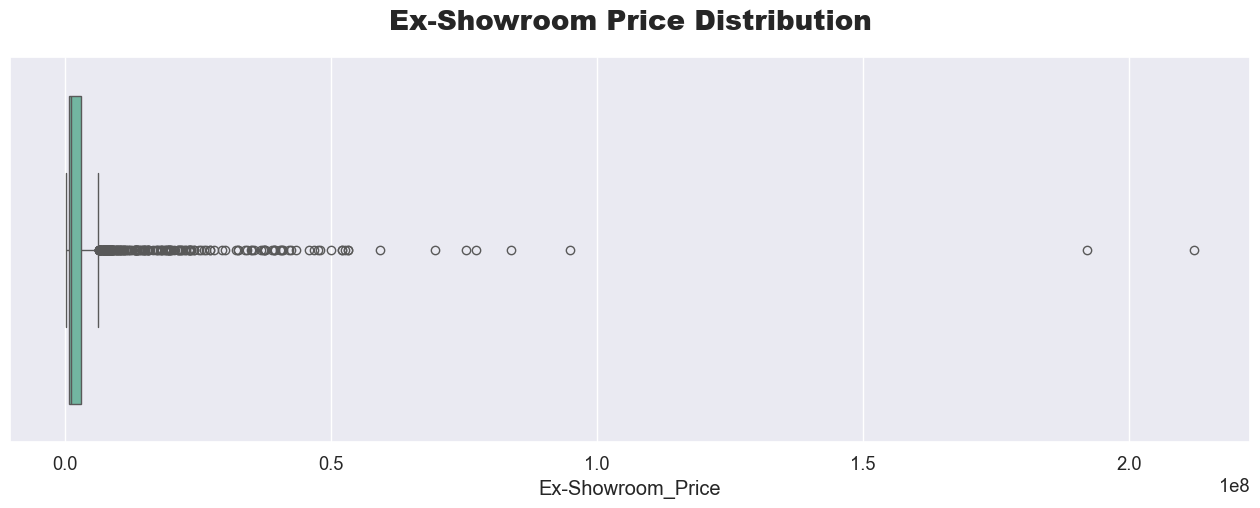

In [130]:
plt.figure(figsize=(16,5))
sns.boxplot(x=df["Ex-Showroom_Price"],palette="Set2")
plt.title("Ex-Showroom Price Distribution",fontweight="black",size=20,pad=20)
plt.show()

In [131]:
df[df["Ex-Showroom_Price"]>150000000][["Car Manufacturer","Car Model","Ex-Showroom_Price"]]

,Car Manufacturer,Car Model,Ex-Showroom_Price
355,Bugatti,Chiron,192142937
356,Bugatti,Chiron,212155397


In [132]:
df.drop([355,356],inplace=True)

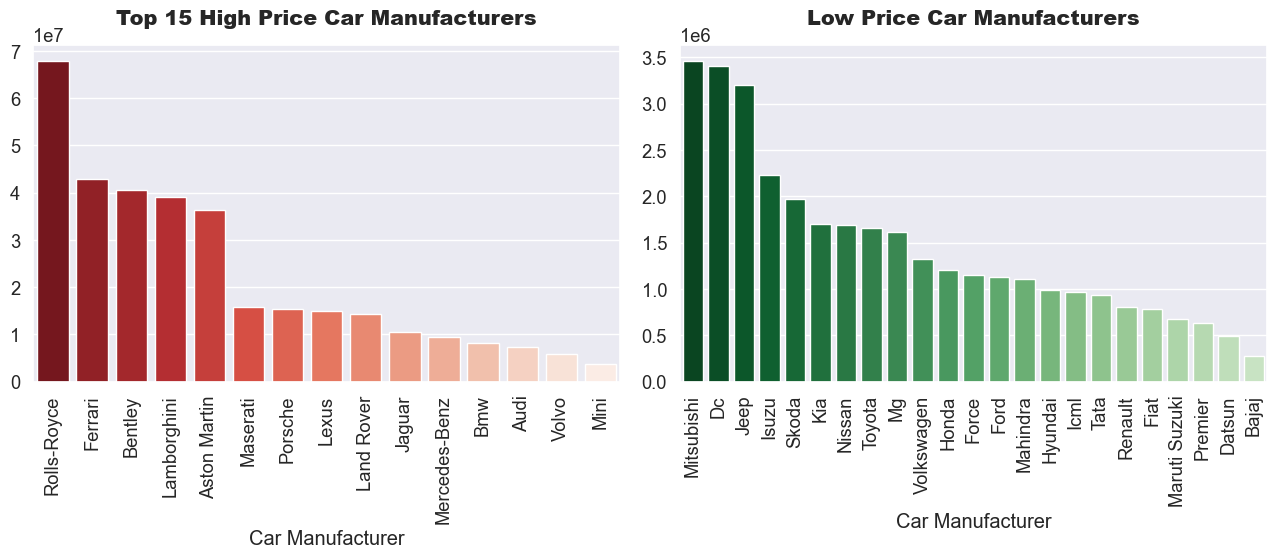

In [133]:
average_price1 = df.groupby(["Car Manufacturer"])["Ex-Showroom_Price"].mean().sort_values(ascending=False)[0:15]
average_price2 = df.groupby(["Car Manufacturer"])["Ex-Showroom_Price"].mean().sort_values(ascending=False)[15:]

plt.figure(figsize=(13,6))
plt.subplot(1,2,1)
sns.barplot(x=average_price1.index, y=average_price1.values, palette=sns.color_palette("Reds",15)[::-1])
plt.title("Top 15 High Price Car Manufacturers",fontweight="black",size=15, pad=15)

plt.xticks(rotation=90)

plt.subplot(1,2,2)
sns.barplot(x=average_price2.index, y=average_price2.values, palette=sns.color_palette("Greens",30)[::-1])
plt.title("Low Price Car Manufacturers",fontweight="black",size=15, pad=15)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

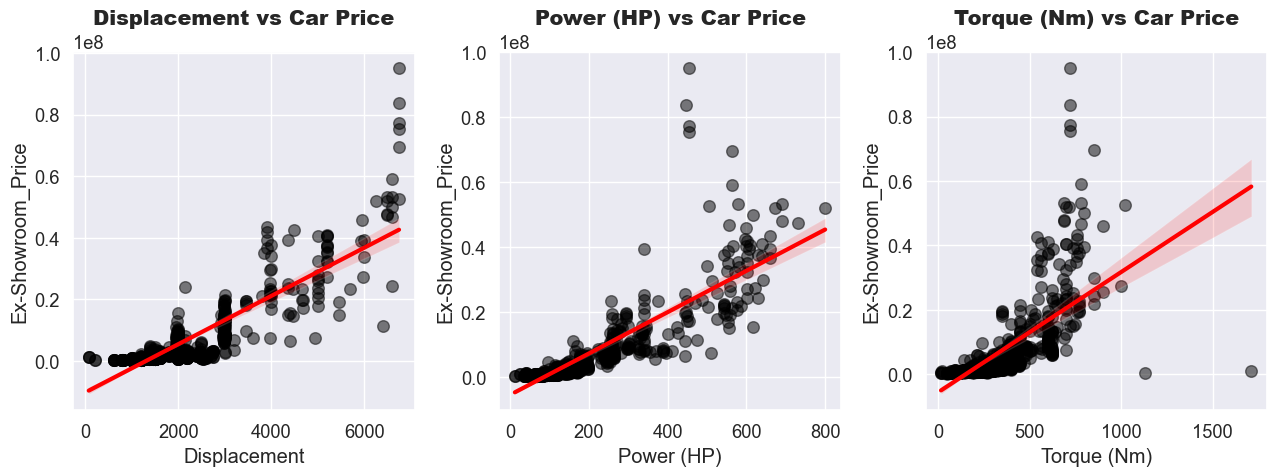

In [134]:
cols = ["Displacement","Power (HP)","Torque (Nm)"]


plt.figure(figsize=(13,5))
for index, column in enumerate(cols):
    plt.subplot(1,3,index+1)
    sns.regplot(x=column, y="Ex-Showroom_Price", data=df, color="black", scatter_kws={'s': 70, 'alpha': 0.5}, 
                line_kws={'color': 'red', 'lw': 3})
    plt.title(f"{column} vs Car Price",pad=20,fontweight="black",size=15)
    plt.tight_layout()

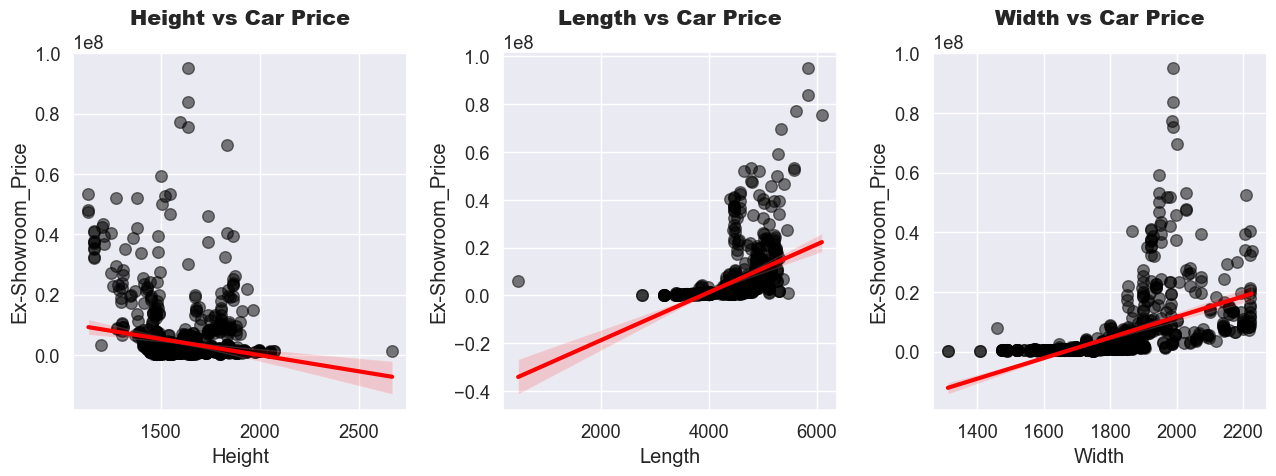

In [135]:
cols = ["Height","Length","Width"]


plt.figure(figsize=(13,5))
for index, column in enumerate(cols):
    plt.subplot(1,3,index+1)
    sns.regplot(x=column, y="Ex-Showroom_Price", data=df, color="black", scatter_kws={'s': 70, 'alpha': 0.5}, 
                line_kws={'color': 'red', 'lw': 3})
    plt.title(f"{column} vs Car Price",pad=20,fontweight="black",size=15)
    plt.tight_layout()


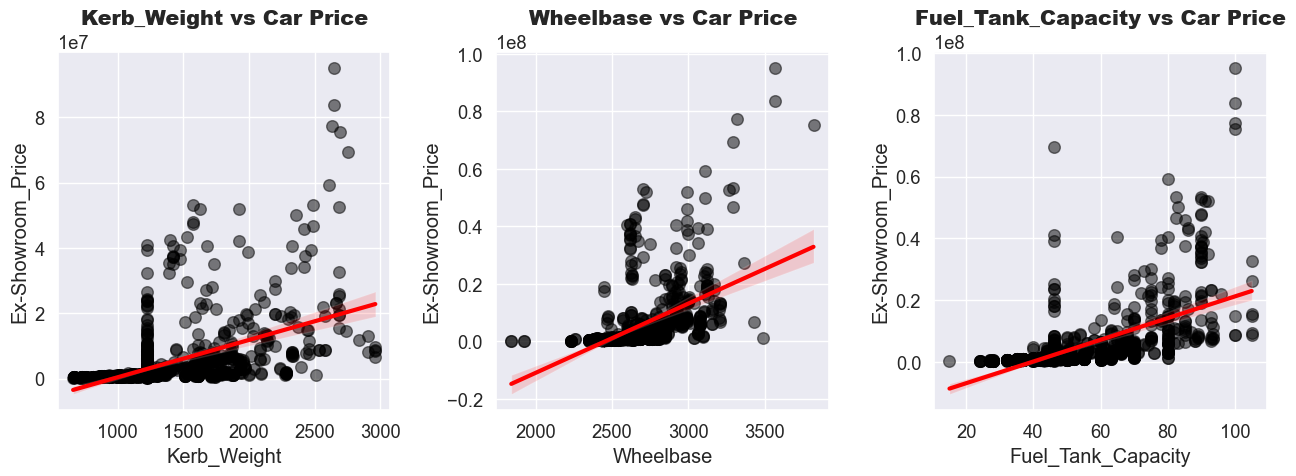

In [136]:
cols = ["Kerb_Weight","Wheelbase","Fuel_Tank_Capacity"]


plt.figure(figsize=(13,5))
for index, column in enumerate(cols):
    plt.subplot(1,3,index+1)
    sns.regplot(x=column, y="Ex-Showroom_Price", data=df, color="black", scatter_kws={'s': 70, 'alpha': 0.5}, 
                line_kws={'color': 'red', 'lw': 3})
    plt.title(f"{column} vs Car Price",pad=20,fontweight="black",size=15)
    plt.tight_layout()

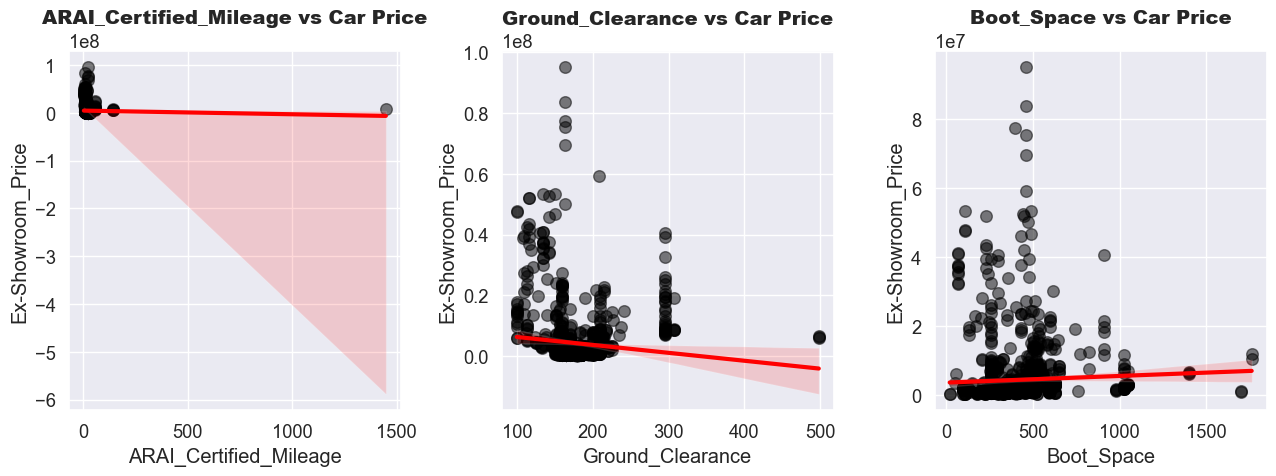

In [137]:
cols = ["ARAI_Certified_Mileage","Ground_Clearance","Boot_Space"]


plt.figure(figsize=(13,5))
for index, column in enumerate(cols):
    plt.subplot(1,3,index+1)
    sns.regplot(x=column, y="Ex-Showroom_Price", data=df, color="black", scatter_kws={'s': 70, 'alpha': 0.5}, 
                line_kws={'color': 'red', 'lw': 3})
    plt.title(f"{column} vs Car Price",pad=20,fontweight="black",size=14)
    plt.tight_layout()

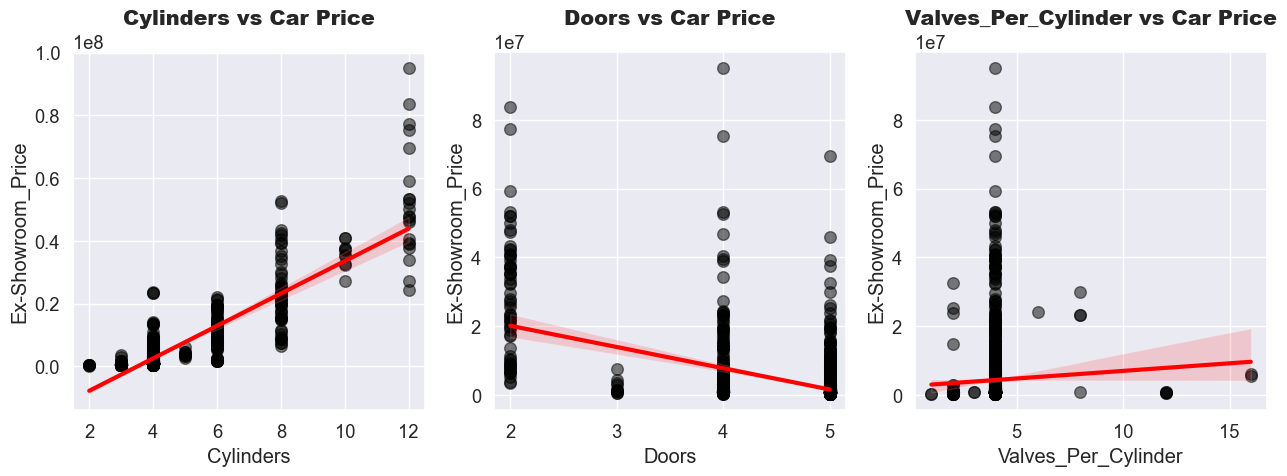

In [138]:
cols = ['Cylinders','Doors','Valves_Per_Cylinder']

plt.figure(figsize=(13,5))
for index, column in enumerate(cols):
    plt.subplot(1,3,index+1)
    sns.regplot(x=column, y="Ex-Showroom_Price", data=df, color="black", scatter_kws={'s': 70, 'alpha': 0.5}, 
                line_kws={'color': 'red', 'lw': 3})
    plt.title(f"{column} vs Car Price",pad=20,fontweight="black",size=15)
    plt.tight_layout()

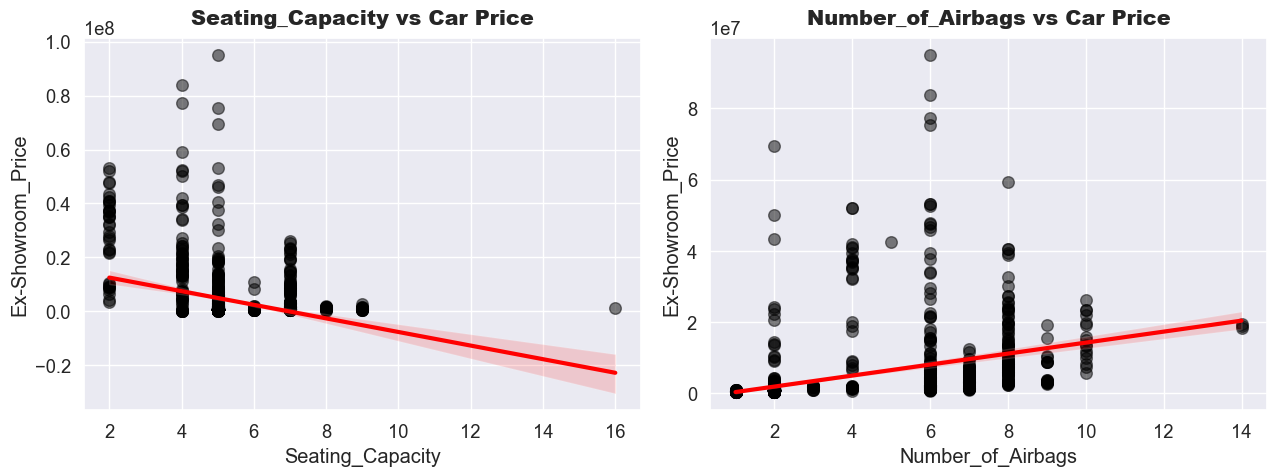

In [139]:
cols =['Seating_Capacity','Number_of_Airbags']

plt.figure(figsize=(13,5))
for index, column in enumerate(cols):
    plt.subplot(1,2,index+1)
    sns.regplot(x=column, y="Ex-Showroom_Price", data=df, color="black", scatter_kws={'s': 70, 'alpha': 0.5}, 
                line_kws={'color': 'red', 'lw': 3})
   
    plt.title(f"{column} vs Car Price",pad=10,fontweight="black",size=15)
    plt.tight_layout()

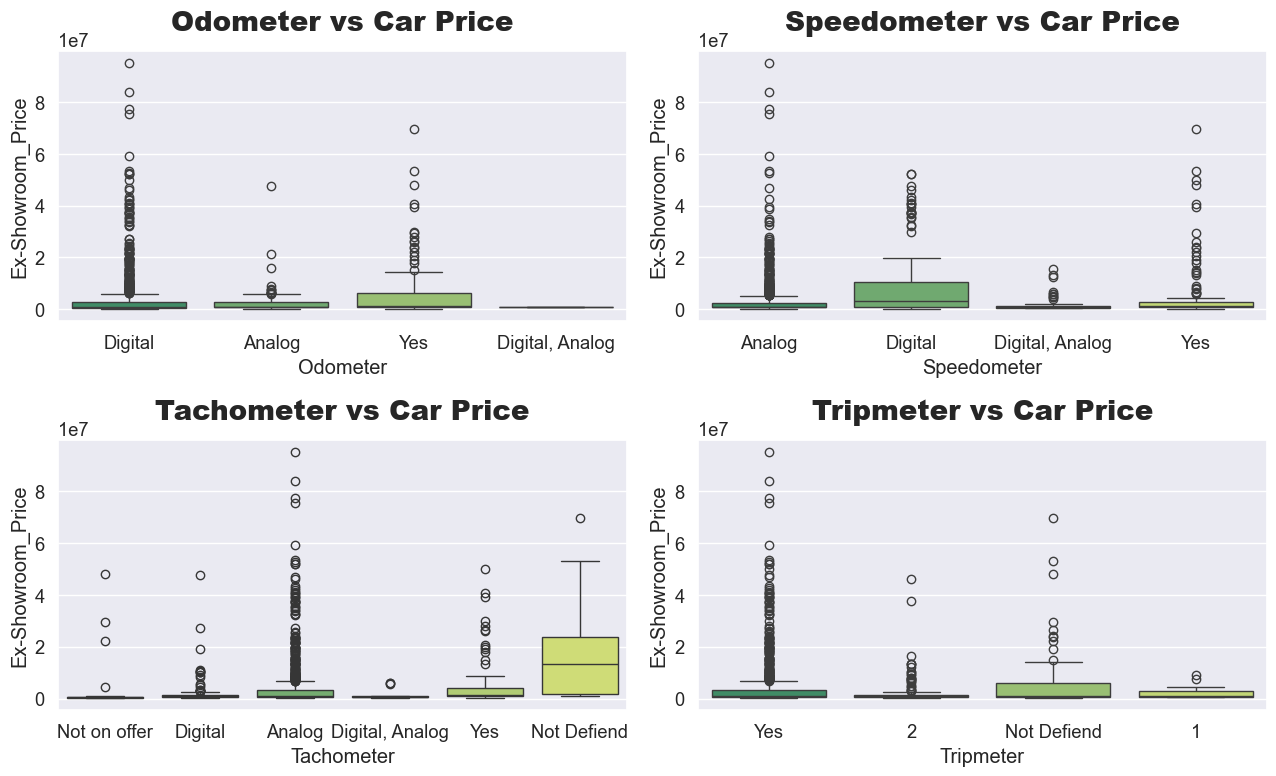

In [140]:
cols = ["Odometer","Speedometer","Tachometer","Tripmeter"]

plt.figure(figsize=(13,8))
for index,column in enumerate(cols):
    plt.subplot(2,2,index+1)
    sns.boxplot(x=df[column], y=df["Ex-Showroom_Price"],palette="summer")
    plt.title(f"{column} vs Car Price",fontweight="black",size=20,pad=15)
    plt.tight_layout()

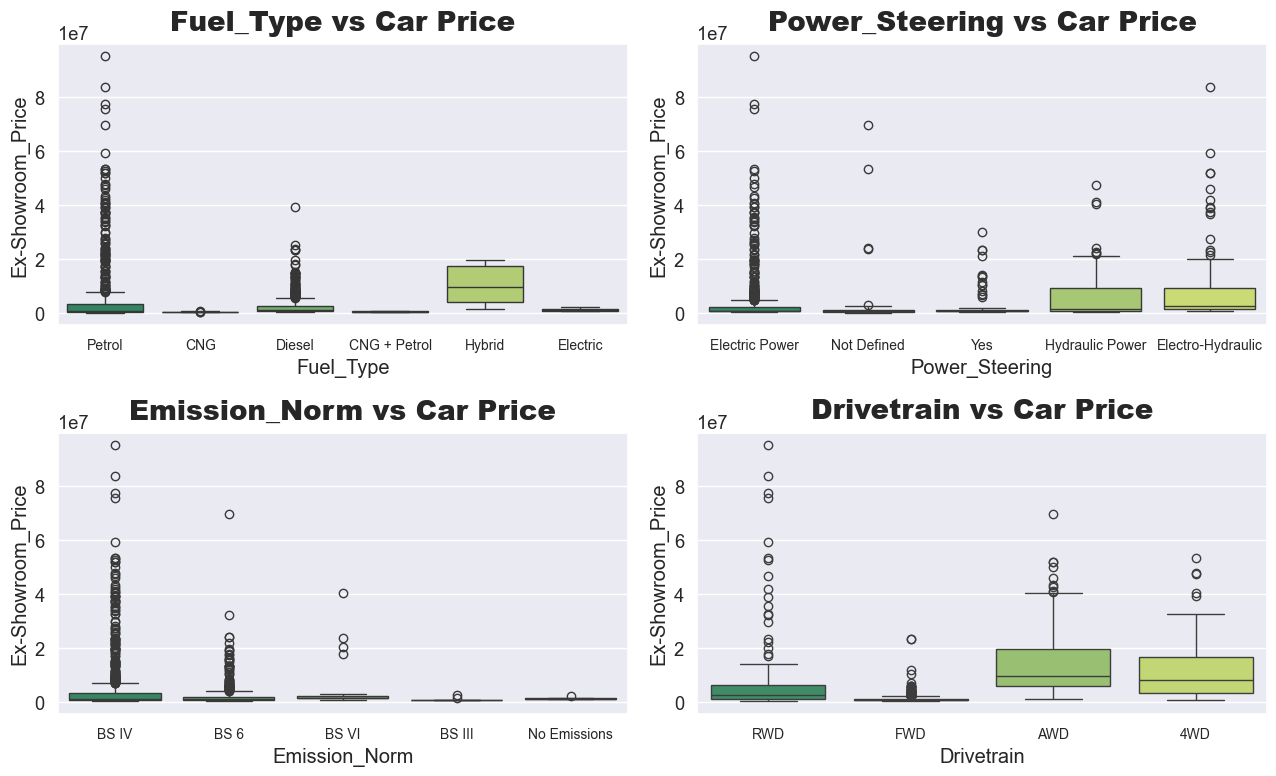

In [141]:
cols = ["Fuel_Type","Power_Steering","Emission_Norm","Drivetrain"]

plt.figure(figsize=(13,8))
for index,column in enumerate(cols):
    plt.subplot(2,2,index+1)
    sns.boxplot(x=df[column],y=df["Ex-Showroom_Price"],palette="summer")
    plt.title(f"{column} vs Car Price",fontweight="black",size=20,pad=10)
    plt.xticks(size=10)
    plt.tight_layout()

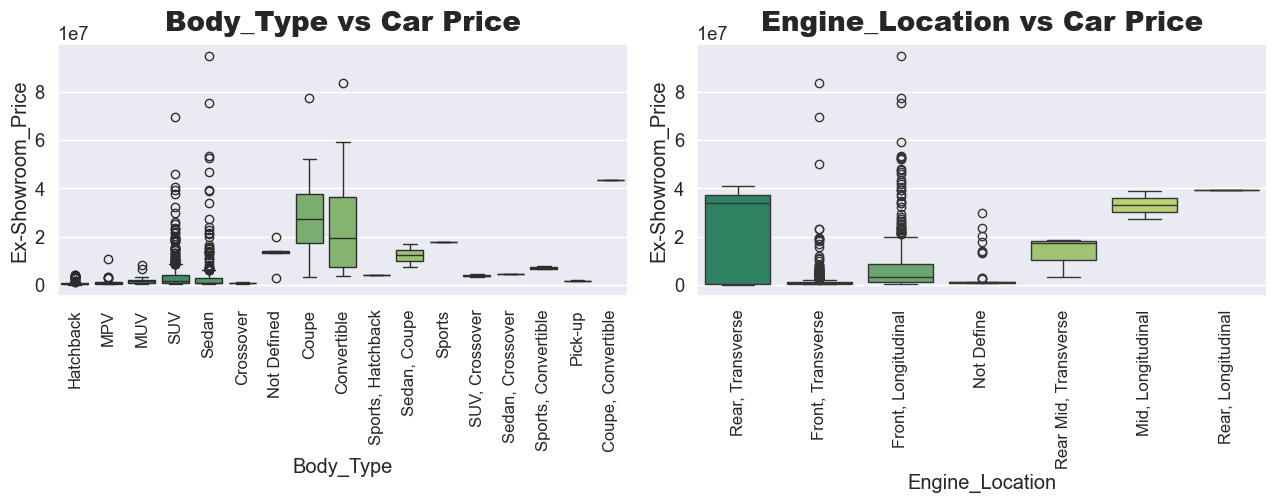

In [142]:
cols = ["Body_Type","Engine_Location"]

plt.figure(figsize=(13,8))
for index,column in enumerate(cols):
    plt.subplot(2,2,index+1)
    sns.boxplot(x=df[column], y=df["Ex-Showroom_Price"],palette="summer")
    plt.title(f"{column} vs Car Price",fontweight="black",size=20,pad=10)
    plt.xticks(size=12,rotation=90)
    plt.tight_layout()

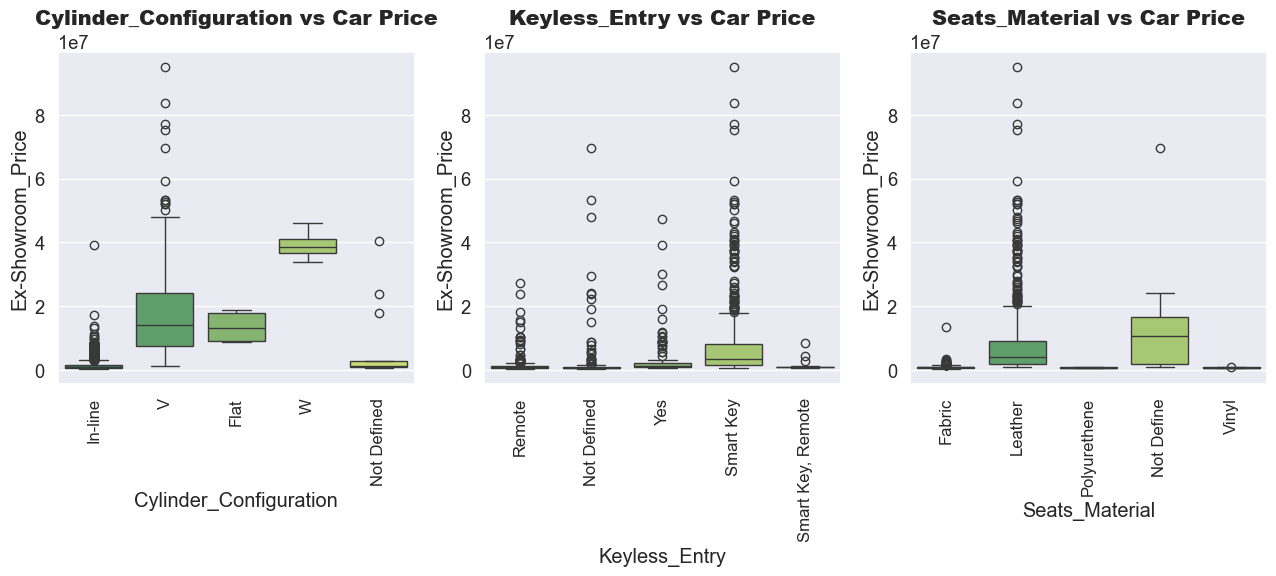

In [143]:
cols = ["Cylinder_Configuration","Keyless_Entry","Seats_Material"]

plt.figure(figsize=(13,6))
for index,column in enumerate(cols):
    plt.subplot(1,3,index+1)
    sns.boxplot(x=df[column], y=df["Ex-Showroom_Price"],palette="summer")
    plt.title(f"{column} vs Car Price",fontweight="black",size=15,pad=20)
    plt.xticks(size=12,rotation=90)
    plt.tight_layout()

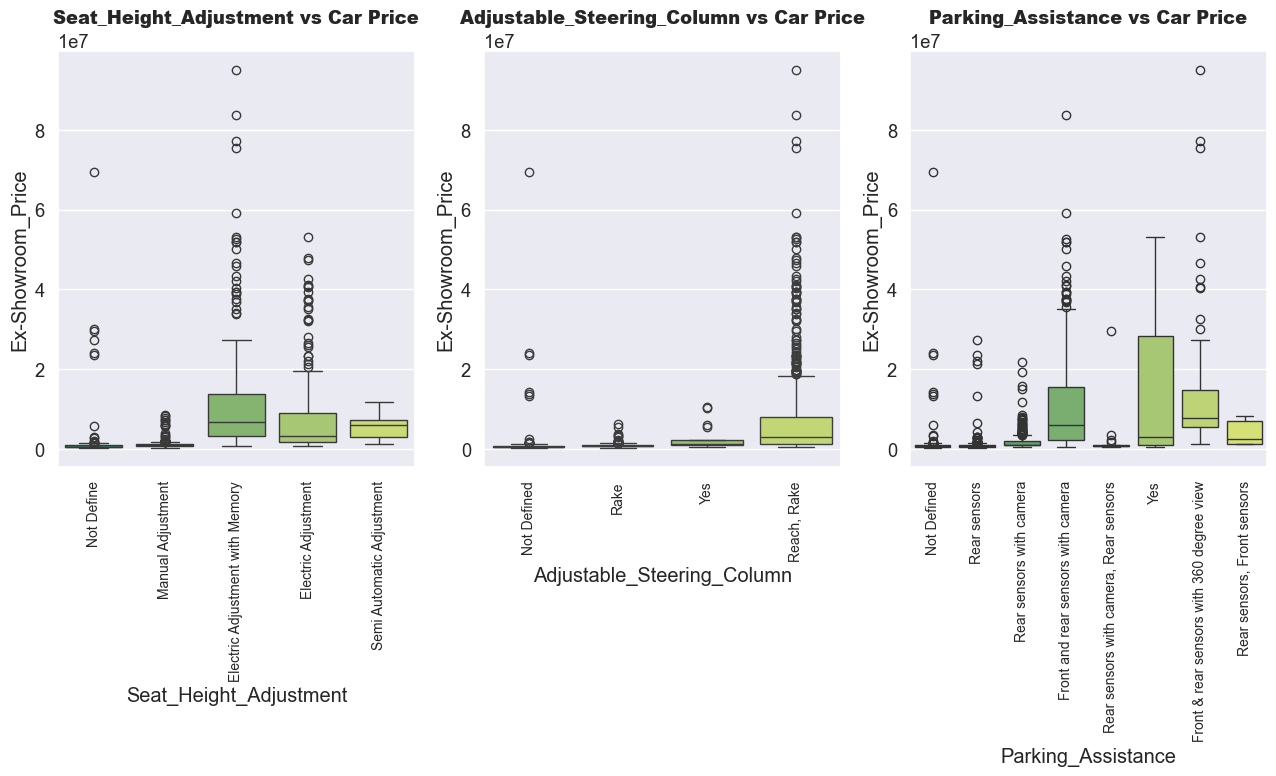

In [144]:
cols = ["Seat_Height_Adjustment","Adjustable_Steering_Column","Parking_Assistance"]

plt.figure(figsize=(13,8))
for index,column in enumerate(cols):
    plt.subplot(1,3,index+1)
    sns.boxplot(x=df[column], y=df["Ex-Showroom_Price"],palette="summer")
    plt.title(f"{column} vs Car Price",fontweight="black",size=13,pad=20)
    plt.xticks(rotation=90,size=10)
    plt.tight_layout()

In [145]:
cols = ['Central_Locking','Child_Safety_Locks','Low_Fuel_Warning','Third_Row_AC_Vents','Second_Row_AC_Vents',
        'Auto-Dimming_Rear-View_Mirror','Engine_Immobilizer','ABS_(Anti-lock_Braking_System)',
        'EBD_(Electronic_Brake-force_Distribution)','Cooled_Glove_Box','EBA_(Electronic_Brake_Assist)',
        'ESP_(Electronic_Stability_Program)','Gear_Shift_Reminder','Key_Off_Reminder','USB_Compatibility',
        'Bluetooth','Navigation_System','Turbocharger',"Automatic_Headlamps","Cruise_Control"]

In [146]:
x = df[cols]
y = df["Ex-Showroom_Price"]


In [147]:
enc = LabelEncoder()
x[cols] = x[cols].apply(enc.fit_transform)

In [148]:
selector = SelectKBest(score_func=f_regression, k=5) 
selector.fit(x, y)

SelectKBest(k=5, score_func=<function f_regression at 0x00000265B2291260>)

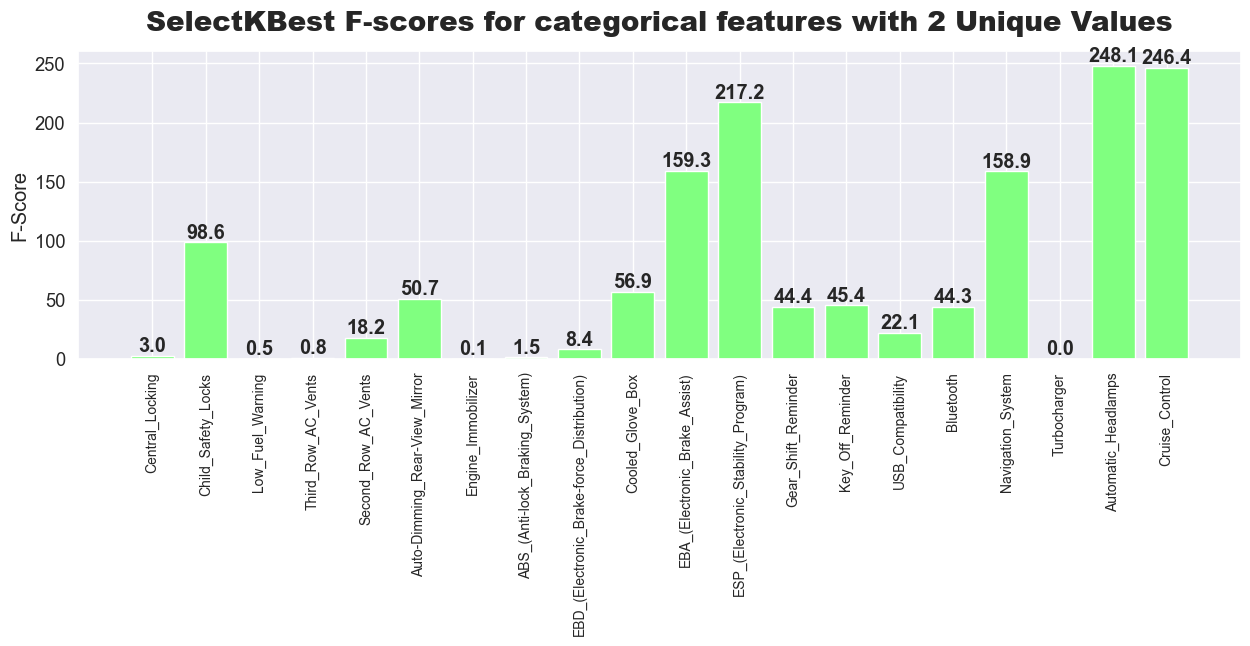

In [149]:
scores = selector.scores_
feature_names = x.columns

plt.figure(figsize=(15, 4))
plt.bar(feature_names,scores,color=(0.5, 1.0, 0.5))
for index,value in enumerate(scores):
    plt.text(index,value,round(value,1),ha="center",fontweight="bold",va="bottom")
plt.ylabel('F-Score')
plt.xticks(rotation=90,size=10)
plt.title('SelectKBest F-scores for categorical features with 2 Unique Values',pad=15,fontweight="black",size=20)
plt.show()

In [150]:
useful_features_1 = x.columns[selector.get_support(indices=True)]
useful_features_1

Index(['EBA_(Electronic_Brake_Assist)', 'ESP_(Electronic_Stability_Program)',
       'Navigation_System', 'Automatic_Headlamps', 'Cruise_Control'],
      dtype='object')

In [151]:
cols = ["Odometer","Speedometer","Tachometer","Tripmeter","Fuel_Type","Power_Steering","Emission_Norm","Drivetrain",
        "Body_Type","Engine_Location","Cylinder_Configuration","Keyless_Entry","Seats_Material",
        "Seat_Height_Adjustment","Adjustable_Steering_Column","Parking_Assistance"]

In [152]:
x = df[cols]
y = df["Ex-Showroom_Price"]

In [153]:
enc = LabelEncoder()
x[cols] = x[cols].apply(enc.fit_transform)

In [154]:
selector = SelectKBest(score_func = f_regression, k=5)
selector.fit(x,y)

SelectKBest(k=5, score_func=<function f_regression at 0x00000265B2291260>)

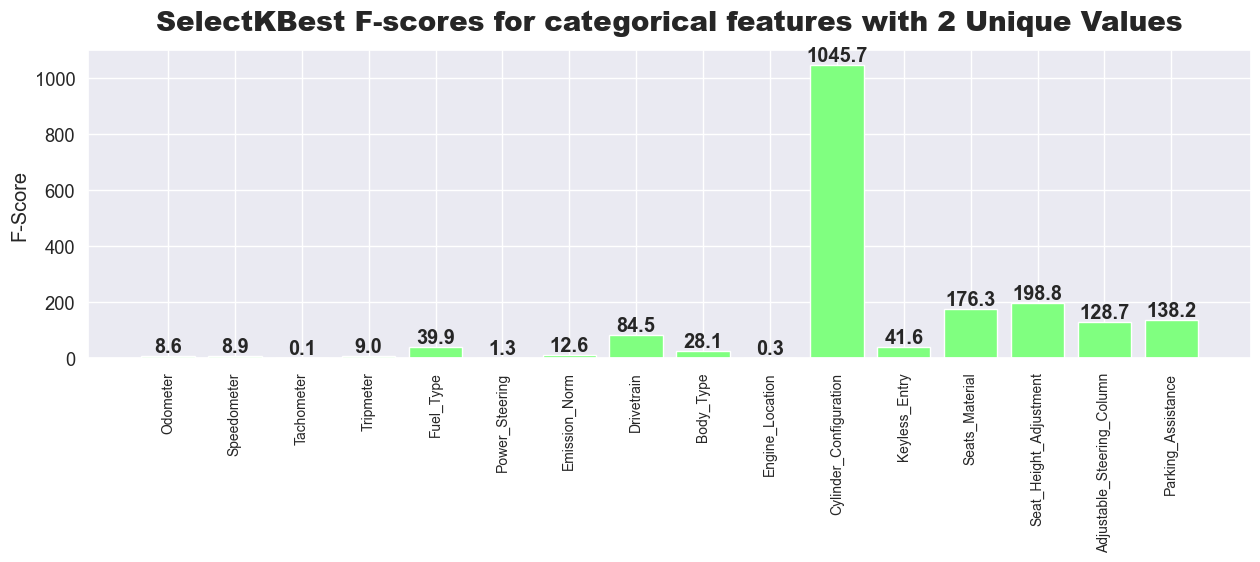

In [155]:
scores = selector.scores_
feature_names = x.columns

plt.figure(figsize=(15, 4))
plt.bar(feature_names,scores,color=(0.5, 1.0, 0.5))
for index,value in enumerate(scores):
    plt.text(index,value,round(value,1),ha="center",fontweight="bold",va="bottom")
plt.ylabel('F-Score')
plt.xticks(rotation=90,size=10)
plt.title('SelectKBest F-scores for categorical features with 2 Unique Values',pad=15,fontweight="black",size=20)
plt.show()

In [156]:
useful_features_2 = x.columns[selector.get_support(indices=True)]
useful_features_2

Index(['Cylinder_Configuration', 'Seats_Material', 'Seat_Height_Adjustment',
       'Adjustable_Steering_Column', 'Parking_Assistance'],
      dtype='object')

In [157]:
cols = ['Cylinders','Doors','Valves_Per_Cylinder','Seating_Capacity','Number_of_Airbags']

In [158]:
x = df[cols]
y = df["Ex-Showroom_Price"]

In [159]:
selector = SelectKBest(score_func=f_regression,k=1)
selector.fit(x,y)


SelectKBest(k=1, score_func=<function f_regression at 0x00000265B2291260>)

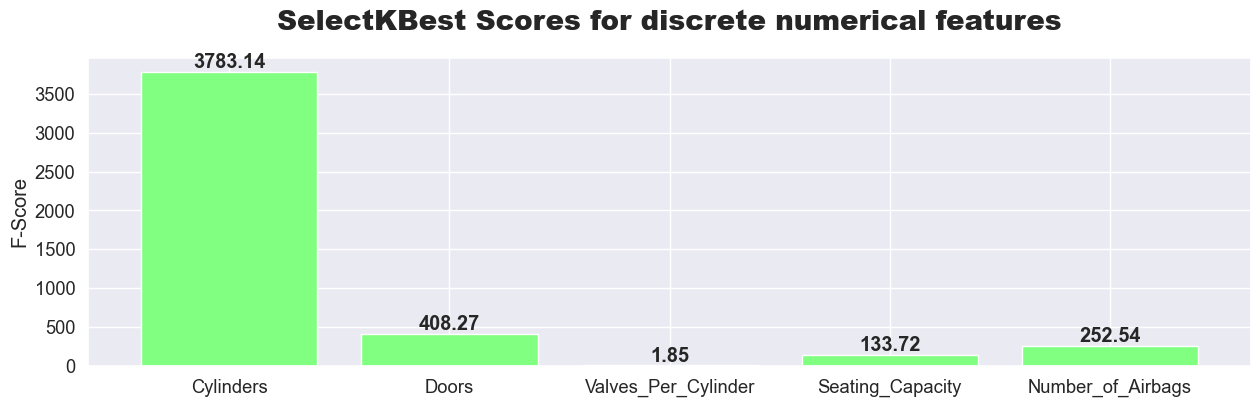

In [160]:
scores = selector.scores_
feature_names = x.columns

plt.figure(figsize=(15, 4))
plt.bar(feature_names, scores,color=(0.5, 1.0, 0.5))
for index,value in enumerate(scores):
    plt.text(index,value,round(value,2),ha="center",fontweight="bold",va="bottom")
plt.ylabel('F-Score')
plt.title('SelectKBest Scores for discrete numerical features',pad=20,fontweight="black",size=20)
plt.show()